<a href="https://colab.research.google.com/github/evandrocf4/ifsp/blob/main/projeto_interdisciplinar_1/projeto/Projeto_Interdisciplinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Interdisciplinar: Wine Dataset**
## D1DAE: Análise Estatística para Ciência de Dados    
## IFSP Campinas
#### **Grupo:**
- Evandro Costa Ferreira (CP3021947)
- Jaqueline Jana da Silva (CP3021891)
- João Pedro de Oliveira Ferreira (CP3021696)

As análises abaixo se referem ao Wine Dataset, a base possui 13 variáveis que são características de um determinado vinho e um target categórico que pode receber valor 0, 1 ou 2, cada categoria representa um produtor diferente, caracterizando uma classificação multiclasse.

**Importando as bibliotecas**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import colorsys
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Definindo as cores personalizadas
colors = ['#a32e61', '#6B8E23', '#4682B4']


**Definindo Funções Customizadas**

In [2]:
##############Função que faz o Blox Plot#########
def Box_Plot(data_treino, data_treino_0, data_treino_1, data_treino_2, nome_coluna):

    # Criando a figura e os subplots
    fig, axs = plt.subplots(1, 4, figsize=(12, 4))

    # Função para adicionar as indicações de quartis nos boxplots
    def add_quartile_annotations(ax, data, delta, lim_sup, lim_inf):
        
        q1 = np.percentile(data, 25)
        median = np.percentile(data, 50)
        q3 = np.percentile(data, 75)
        
        q1_lim = (q1-lim_inf)/delta
        median_lim = (median-lim_inf)/delta
        q3_lim = (q3-lim_inf)/delta

        ax.text(0.05, q1_lim-0.05, f'Q1: {q1:.2f}', transform=ax.transAxes, ha='left')
        ax.text(0.1, median_lim+0.01, f'Mediana: {median:.2f}', transform=ax.transAxes, ha='left')
        ax.text(0.05, q3_lim+0.05, f'Q3: {q3:.2f}', transform=ax.transAxes, ha='left')

    # Plotando o primeiro boxplot (base treino)
    ax0 = sns.boxplot(y=data_treino, ax=axs[0], color = '#CCCCCC') #595959
    axs[0].set_title('Todas as classes')

    # Plotando o segundo boxplot (base treino_0)
    ax1 = sns.boxplot(y=data_treino_0, ax=axs[1], color = '#a32e61')

    axs[1].set_title('Classe 0 ')

    # Plotando o terceiro boxplot (base treino_1)
    ax2 = sns.boxplot(y=data_treino_1, ax=axs[2], color = '#6B8E23')
    axs[2].set_title('Classe 1')

    # Plotando o quarto boxplot (base treino_2)
    ax3 = sns.boxplot(y=data_treino_2, ax=axs[3], color = '#4682B4')
    axs[3].set_title('Classe 2')

    # Ajustando a dimensão dos eixos
    

    # Configurando as legendas dos eixos
    for ax in axs:
        ax.set_ylabel(nome_coluna)
        ax.set_xlabel('')
        ax.set_ylim(ax0.get_ylim())
        
    x, y = ax0.get_ylim()
    
    
    add_quartile_annotations(ax0, data_treino, delta = y-x, lim_sup = y, lim_inf =x)
    add_quartile_annotations(ax1, data_treino_0, delta = y-x, lim_sup = y, lim_inf =x)
    add_quartile_annotations(ax2, data_treino_1, delta = y-x, lim_sup = y, lim_inf = x)
    add_quartile_annotations(ax3, data_treino_2, delta = y-x, lim_sup = y, lim_inf = x)
    
    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()

##############Função que faz o Histograma#########
def dist(base, coluna_dist, coluna_target):

    # Configuração dos subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Primeiro gráfico - Distribuição geral
    sns.histplot(data = base, x =coluna_dist, ax=axs[0], color = '#CCCCCC', alpha = 0.5)
    axs[0].set_title('Distribuição Geral')


    # Segundo gráfico - Distribuição por classes
    sns.histplot(data=base, x=coluna_dist, hue = coluna_target, ax=axs[1], multiple='stack', palette=['#a32e61', '#6B8E23', '#4682B4'], alpha = 0.5)
    axs[1].set_title('Distribuição por Classes')

    # Ajuste de layout
    plt.tight_layout()

    # Exibição dos gráficos
    plt.show()

##############Função que faz uma breve análise da variável##############
def analise_desc(data_treino, data_treino_0, data_treino_1, data_treino_2, coluna):
    
    # Obtendo os descritivos para cada base
    desc_treino = data_treino[coluna].describe().to_frame()
    desc_treino_0 = data_treino_0[coluna].describe().to_frame()
    desc_treino_1 = data_treino_1[coluna].describe().to_frame()
    desc_treino_2 = data_treino_2[coluna].describe().to_frame()

    # Renomeando as colunas para "Todas as Classes", "Classe 0", "Classe 1" e "Classe 2"
    desc_treino.columns = ['Todas as Classes']
    desc_treino_0.columns = ['Classe 0']
    desc_treino_1.columns = ['Classe 1']
    desc_treino_2.columns = ['Classe 2']

    # Concatenando os dataframes em um único dataframe
    desc_concatenado = pd.concat([desc_treino, desc_treino_0, desc_treino_1, desc_treino_2], axis=1)

    return desc_concatenado.round(2)

##############Função que faz gráfico de barras##############
def grafico_barras(eixo_x, eixo_y, data_frame, title, ylabel):
    labels = data_frame[eixo_x].unique()
    x = np.arange(len(labels))
    width = 0.8

    fig, ax = plt.subplots()
    rects = ax.bar(x, data_frame[eixo_y], width, color=colors[:len(data_frame[eixo_x])], alpha = 0.5)

    ax.set_title(title)
    ax.set_xlabel(eixo_x)
    ax.set_ylabel(ylabel)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    autolabel(rects, ax)

    plt.show()

def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0), textcoords="offset points",
                    ha='center', va='bottom')

##############Função que faz gráfico de dispersão##############
def plotar_graficos(tupla_colunas, data, target_names, feature_names):
    
    target = data['target']
    data_copy = data.drop('target', axis=1)
    
    num_plots = len(tupla_colunas)
    num_rows = (num_plots + 2) // 3  # número de linhas de subplots

    fig, axs = plt.subplots(num_rows, 3, figsize=(12, 4 * num_rows), squeeze=False)

    for i, (coluna_x, coluna_y) in enumerate(tupla_colunas):
        col_x_index = feature_names.index(coluna_x)
        col_y_index = feature_names.index(coluna_y)

        ax = axs[i // 3, i % 3]
        for j in range(len(target_names)):
            class_data_x = data_copy[target == j].iloc[:, col_x_index]  # Acesso aos dados corrigido
            class_data_y = data_copy[target == j].iloc[:, col_y_index]  # Acesso aos dados corrigido
            ax.scatter(class_data_x, class_data_y, 
                       color=colors[j], 
                       label='Classe ' + str(target_names[j]),
                       alpha = 0.5)
        # Realizar regressão linear
        x = data_copy.iloc[:, col_x_index]
        y = data_copy.iloc[:, col_y_index]
        coeficients = np.polyfit(x, y, 1)  # Grau 1 para uma reta
        line = np.poly1d(coeficients)
        ax.plot(x, line(x), color='red', label='Reta de ajuste')    

        ax.set_xlabel(coluna_x)
        ax.set_ylabel(coluna_y)
        ax.legend()

    # Remover subplots vazios, se houver
    if num_plots % 3 != 0:
        for i in range(num_plots % 3, 3):
            fig.delaxes(axs[num_rows - 1, i])

    plt.tight_layout()
    plt.show()






## 📚 1. Wine Dataset

**Carregando o data frame**

In [3]:
df = load_wine(as_frame=True).data
df['target'] = load_wine(as_frame=True).target.to_frame()
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


**Verificando a quantidade da coluna target e seu percentual**

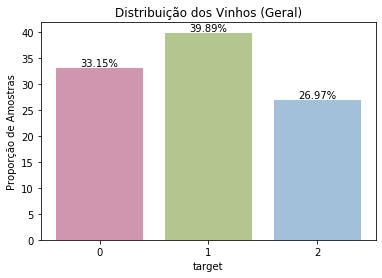

In [4]:
result = df.groupby('target').size().reset_index(name='qtd')
result['percentual'] = round(result['qtd'] / len(df) * 100,2)

grafico_barras('target', 'percentual', result, 'Distribuição dos Vinhos (Geral)', 'Proporção de Amostras')

**Filtrando as bases por target**

In [5]:
target_0 = df.loc[df['target'] == 0]
target_1 = df.loc[df['target'] == 1]
target_2 = df.loc[df['target'] == 2]

**Vamos dividir a base em treino e teste antes da análise exploratória para não se tomar alguma decisão baseado nos dados de teste**

In [6]:
train_0, teste_0 = train_test_split(target_0, test_size=0.2, random_state=42)
train_1, teste_1 = train_test_split(target_1, test_size=0.2, random_state=42)
train_2, teste_2 = train_test_split(target_2, test_size=0.2, random_state=42)

**Consolidando Base de Treino e Teste**

In [7]:
treino = pd.concat([train_0, train_1, train_2], ignore_index=True)
teste = pd.concat([teste_0, teste_1, teste_2], ignore_index=True)

In [8]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       141 non-null    float64
 1   malic_acid                    141 non-null    float64
 2   ash                           141 non-null    float64
 3   alcalinity_of_ash             141 non-null    float64
 4   magnesium                     141 non-null    float64
 5   total_phenols                 141 non-null    float64
 6   flavanoids                    141 non-null    float64
 7   nonflavanoid_phenols          141 non-null    float64
 8   proanthocyanins               141 non-null    float64
 9   color_intensity               141 non-null    float64
 10  hue                           141 non-null    float64
 11  od280/od315_of_diluted_wines  141 non-null    float64
 12  proline                       141 non-null    float64
 13  targe

**Contando os valores nulos em todo o DataFrame**

In [9]:
total_valores_nulos = treino.isnull().sum().sum()

# Exibindo o resultado

print('Este dataset tem {:.0f} atributos/colunas e {:.0f} linhas/amostras das quais, {:.0f} são linhas/amostras nulas.\nLogo, temos uma inconsistência de {:.2f}%'.format(treino.shape[1], treino.shape[0], total_valores_nulos, (total_valores_nulos/df.shape[0])*100 ))

Este dataset tem 14 atributos/colunas e 141 linhas/amostras das quais, 0 são linhas/amostras nulas.
Logo, temos uma inconsistência de 0.00%


**Verificando a quantidade da coluna target**

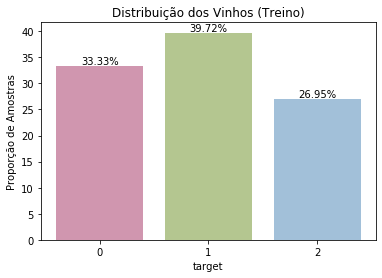

In [10]:
result_train = treino.groupby('target').size().reset_index(name='qtd')
result_train['percentual'] = round(result_train['qtd'] / len(treino) * 100,2)
result_train

grafico_barras('target', 'percentual', result_train, 'Distribuição dos Vinhos (Treino)', 'Proporção de Amostras')

**Verificando a quantidade da coluna target**

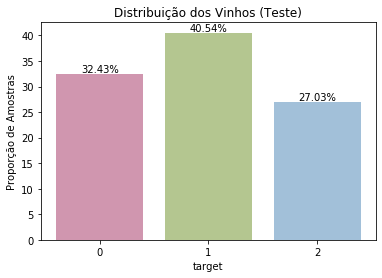

In [11]:
result_test = teste.groupby('target').size().reset_index(name='qtd')
result_test['percentual'] = round(result_test['qtd'] / len(teste) * 100,2)
result_test

grafico_barras('target', 'percentual', result_test, 'Distribuição dos Vinhos (Teste)', 'Proporção de Amostras')

* Note que os percentuais da base de treino e teste estão semelhantes

## 📊 2. Análise Exploratória

### 📊 2.1 Análise Exploratória - alcohol

---


Na coluna "Alcohol", temos a informação referente ao teor alcoólico presente no vinho, sendo esta uma de suas características mais conhecidas. O teor alcoólico é determinado pela concentração de álcool etílico na composição, resultado da fermentação do açúcar presente nas uvas durante o processo de vinificação.

Esta característica afeta diretamente tanto o sabor quanto a corpulência do vinho. Em termos de sabor, o álcool contribui para a percepção de doçura e calor na boca, podendo variar de um perfil mais leve e suave a um perfil mais intenso e robusto, dependendo do nível de álcool presente. Vinhos com teor alcoólico mais baixo tendem a apresentar uma sensação mais refrescante e delicada, enquanto aqueles com teor alcoólico mais elevado podem ter uma sensação mais rica e encorpada.

In [12]:
desc_alcohol = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'alcohol')
desc_alcohol

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,12.99,13.70,12.25,13.20
std,0.80,0.45,0.52,0.52
min,11.03,12.85,11.03,12.25
25%,12.36,13.34,11.86,12.84
50%,13.05,13.72,12.29,13.20
75%,13.63,14.06,12.51,13.50
max,14.83,14.83,13.67,14.34


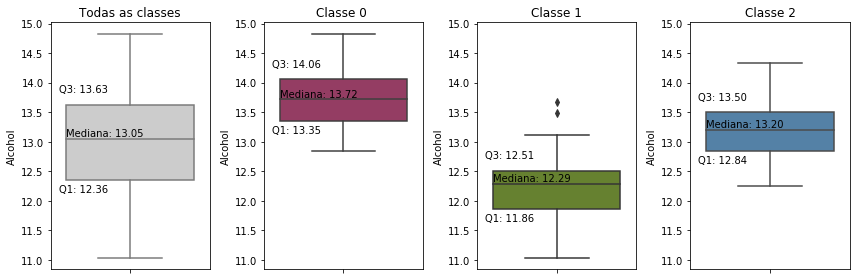

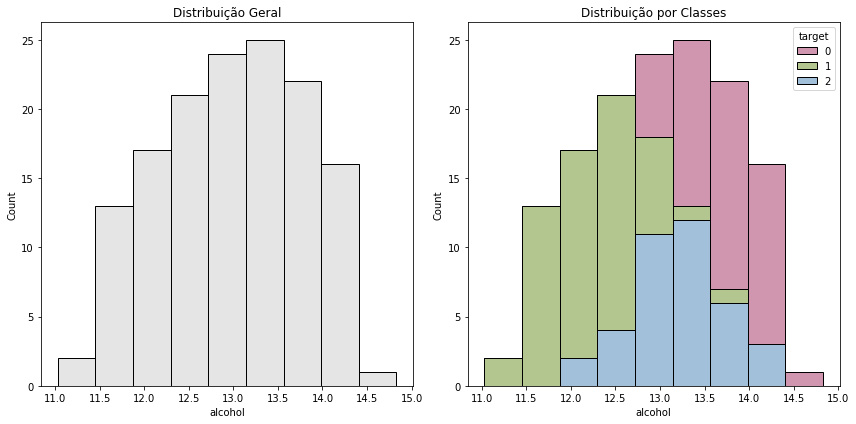

In [13]:
# BoxPlot
Box_Plot(data_treino = treino['alcohol'], data_treino_0 = train_0['alcohol'], data_treino_1 = train_1['alcohol'], data_treino_2 = train_2['alcohol'], nome_coluna = 'Alcohol')

# Distribuição dos dados
dist(treino, 'alcohol', 'target')

### 📊 2.2 Análise Exploratória - malic_acid
---
A coluna 'malic_acid' se refere a quantidade de ácido málico presente no vinho.
Este ácido está presente em várias frutas e desempenha um papel crucial na determinação do perfil de sabor e na qualidade do vinho. 

Durante o processo de fermentação, as leveduras presentes no mosto de uva convertem o ácido málico em ácido lático, por meio de um processo conhecido como fermentação málica. Essa conversão reduz a acidez do vinho e suaviza seu sabor. Portanto, a quantidade de ácido málico presente nos vinhos afeta diretamente a acidez total e o equilíbrio gustativo da bebida.

In [14]:
desc_malic_acid = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'malic_acid')
desc_malic_acid

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,2.36,2.01,1.99,3.32
std,1.11,0.70,1.09,1.00
min,0.74,1.35,0.74,1.35
25%,1.61,1.64,1.31,2.58
50%,1.87,1.77,1.64,3.26
75%,3.17,1.91,2.14,3.90
max,5.80,3.99,5.80,5.51


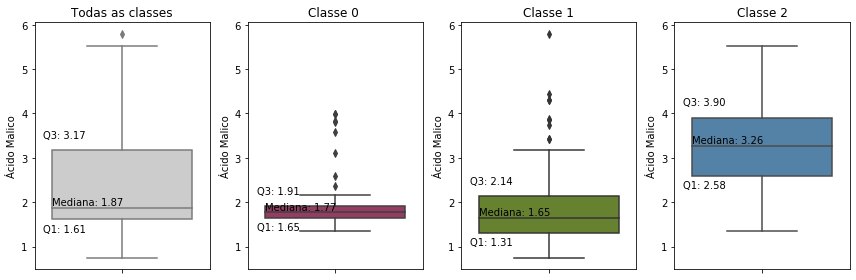

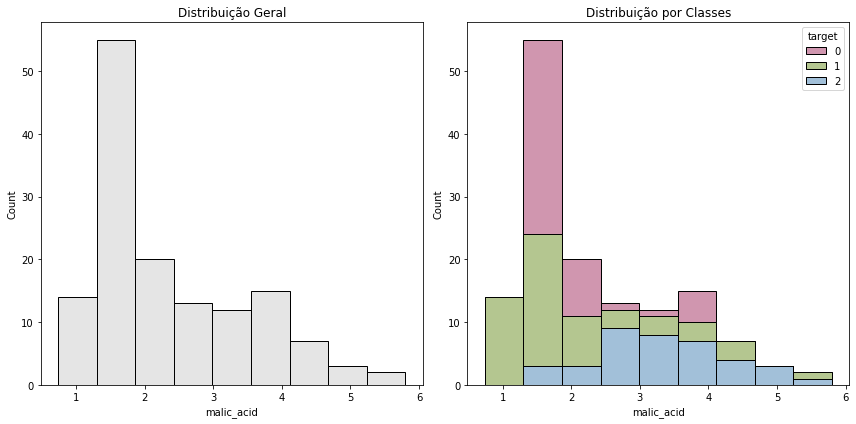

In [15]:
Box_Plot(data_treino = treino['malic_acid'], data_treino_0 = train_0['malic_acid'], data_treino_1 = train_1['malic_acid'], data_treino_2 = train_2['malic_acid'], nome_coluna = 'Ácido Malico')
dist(treino, 'malic_acid', 'target')

### 📊 2.3 Análise Exploratória - ash
---
A coluna 'ash' se refere ao teor de cinzas presentes nos vinhos após sua a incineração, e não está diretamente relacionada à qualidade ou sabor do produto.

No caso específico do vinho, a análise de cinzas pode fornecer informações sobre os minerais presentes, como cálcio, potássio, sódio, magnésio, ferro e outros elementos traços. Esses minerais são essenciais para o crescimento e desenvolvimento das vinhas.



In [16]:
desc_ash = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'ash')
desc_ash

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,2.36,2.44,2.24,2.45
std,0.26,0.21,0.30,0.19
min,1.70,2.04,1.70,2.15
25%,2.20,2.28,2.00,2.30
50%,2.36,2.42,2.23,2.40
75%,2.56,2.61,2.40,2.61
max,3.23,2.87,3.23,2.86


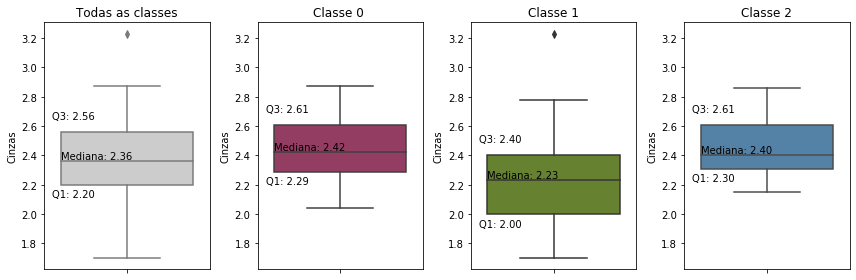

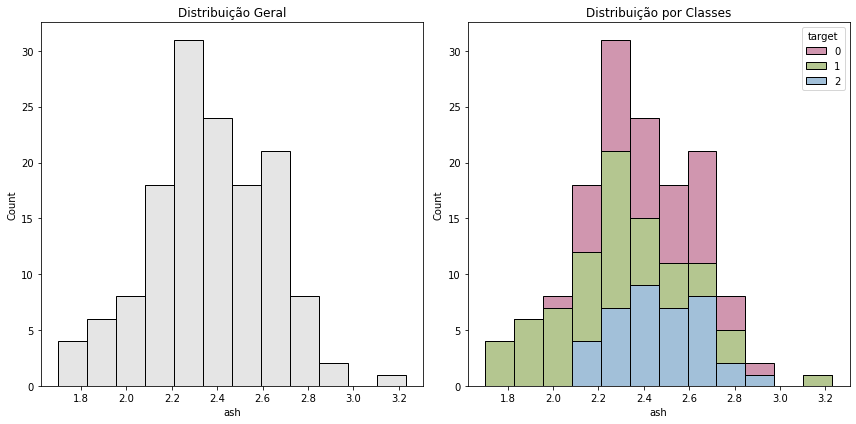

In [17]:
Box_Plot(data_treino = treino['ash'], data_treino_0 = train_0['ash'], data_treino_1 = train_1['ash'], data_treino_2 = train_2['ash'], nome_coluna = 'Cinzas')
dist(treino, 'ash', 'target')

### 📊 2.4 Análise Exploratória - alcalinity_of_ash
---
A coluna 'alcalinity_of_ash' se refere a alcalinidade das cinzas do vinho. 

A alcalinidade é uma medida da capacidade de neutralizar ácidos. Quanto maior seu valor, maior será a quantidade de compostos alcalinhos e maior sua capacidade de neutralização ácida.

Essa feature desempenha um papel importante na percepção do corpo e textura do vinho.

In [18]:
desc_alcalinity_of_ash = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'alcalinity_of_ash')
desc_alcalinity_of_ash

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,19.63,17.02,20.54,21.53
std,3.34,2.40,3.36,2.16
min,11.20,11.20,14.80,18.00
25%,17.20,16.00,18.00,20.00
50%,19.50,17.00,20.65,21.25
75%,21.50,18.70,22.12,23.00
max,30.00,22.50,30.00,25.50


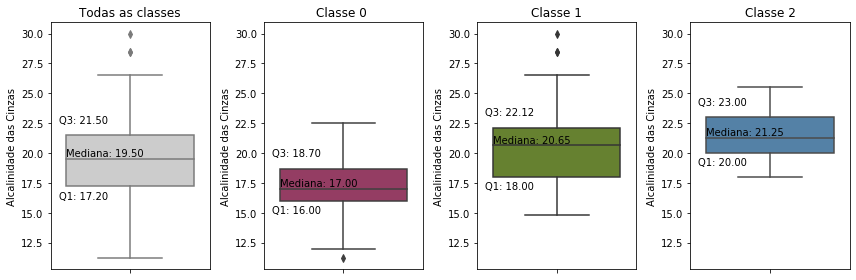

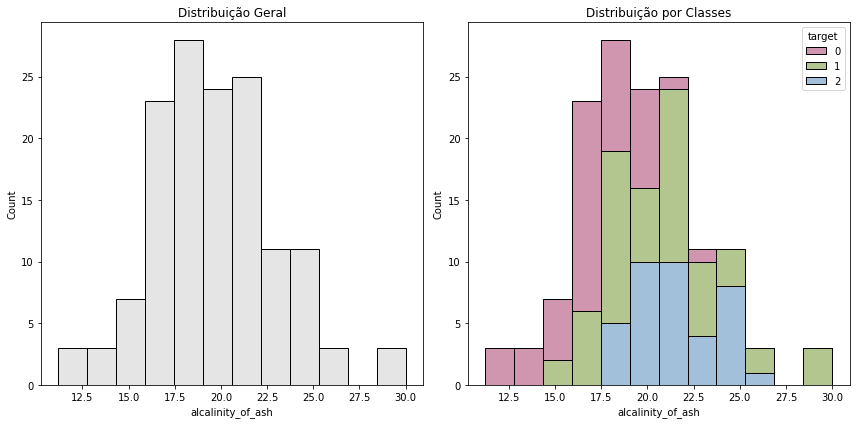

In [19]:
Box_Plot(data_treino = treino['alcalinity_of_ash'], data_treino_0 = train_0['alcalinity_of_ash'], data_treino_1 = train_1['alcalinity_of_ash'], data_treino_2 = train_2['alcalinity_of_ash'], nome_coluna = 'Alcalinidade das Cinzas')
dist(treino, 'alcalinity_of_ash', 'target')

### 📊 2.5 Análise Exploratória - magnesium
---
A coluna 'magnesium' se refere a quantidade de magnésio presente no vinho. Varia de acordo com a região de cultivo da uva, do tipo de solo, do clima, do tipo de uva e das práticas agrícolas adotadas.

O magnésio contribui para a estrutura e a sensação na boca, ao degustar um vinho. Concentrações adequadas ajudam a equilibrar a acidez e a suavizar a sensação de amargor.


In [20]:
desc_magnesium = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'magnesium')
desc_magnesium

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,99.61,105.77,93.98,100.29
std,14.20,10.29,16.49,11.41
min,70.00,90.00,70.00,80.00
25%,88.00,98.00,85.00,90.25
50%,98.00,103.00,88.00,98.00
75%,107.00,113.50,98.25,106.75
max,162.00,132.00,162.00,123.00


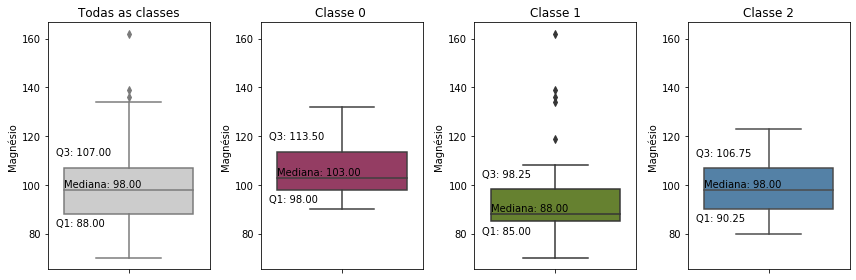

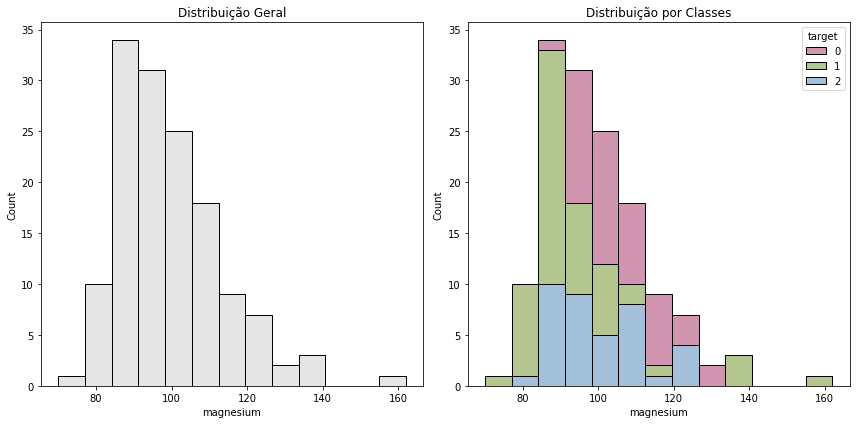

In [21]:
Box_Plot(data_treino = treino['magnesium'], data_treino_0 = train_0['magnesium'], data_treino_1 = train_1['magnesium'], data_treino_2 = train_2['magnesium'], nome_coluna = 'Magnésio')
dist(treino, 'magnesium', 'target')

### 📊 2.6 Análise Exploratória - total_phenols
---
A coluna 'total_phenols' se refere a concentração dos fenóis presentes no vinho. Os fenóis são uma classe de compostos quimicos que incluem flavanoides, taninos e outros polifenóis.
 
É um composto responsável pela intensidade da cor, sabor, estrutura e aroma do vinho.


In [22]:
desc_total_phenols = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'total_phenols')
desc_total_phenols

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,2.30,2.81,2.28,1.69
std,0.61,0.33,0.53,0.38
min,0.98,2.20,1.10,0.98
25%,1.79,2.60,1.95,1.40
50%,2.40,2.80,2.20,1.64
75%,2.80,2.99,2.57,1.82
max,3.88,3.88,3.52,2.80


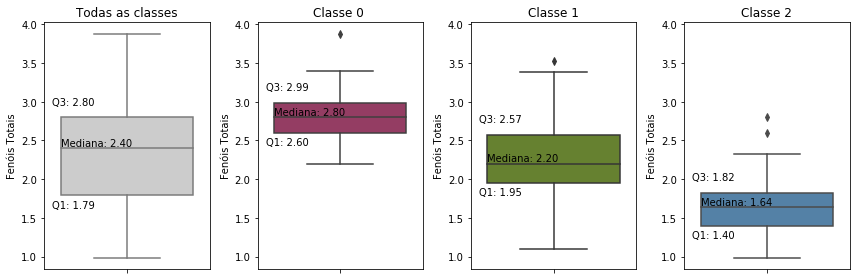

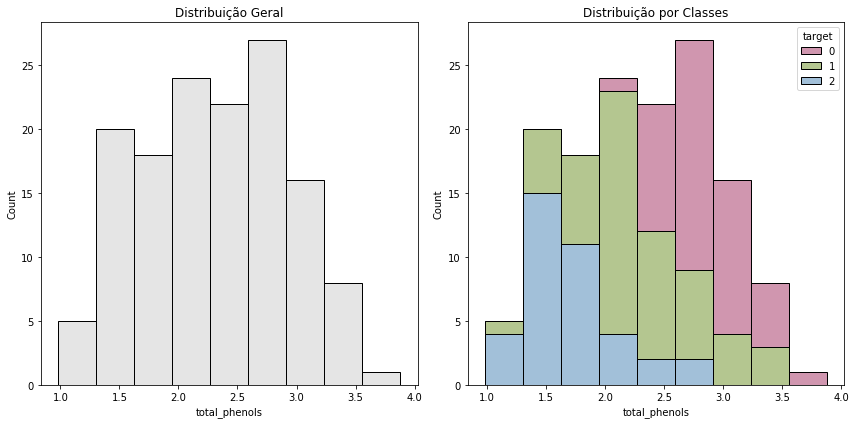

In [23]:
Box_Plot(data_treino = treino['total_phenols'], data_treino_0 = train_0['total_phenols'], data_treino_1 = train_1['total_phenols'], data_treino_2 = train_2['total_phenols'], nome_coluna = 'Fenóis Totais')
dist(treino, 'total_phenols', 'target')

### 📊 2.7 Análise Exploratória - flavanoids
---
A coluna 'flavanoids' se refere a quantidade de flavonoides presentes no vinho.

Flavanoids contribuem para os aromas de flores, frutas e especiarias presentes no vinho. São encontrados em várias partes da uva, incluindo casca, semente e polpa, e são transferidos para o vinho durante o processo de vinificação.



In [24]:
desc_flavanoids = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'flavanoids')
desc_flavanoids

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,2.05,2.95,2.13,0.81
std,0.98,0.39,0.71,0.30
min,0.34,2.19,0.99,0.34
25%,1.22,2.68,1.64,0.60
50%,2.17,2.97,2.06,0.72
75%,2.89,3.18,2.46,0.95
max,5.08,3.93,5.08,1.57


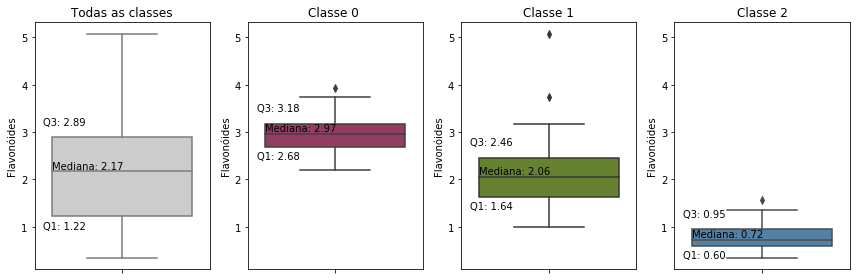

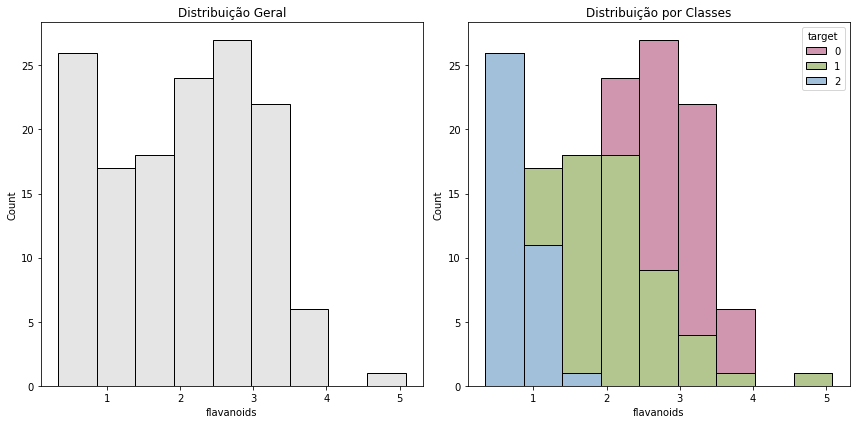

In [25]:
Box_Plot(data_treino = treino['flavanoids'], data_treino_0 = train_0['flavanoids'], data_treino_1 = train_1['flavanoids'], data_treino_2 = train_2['flavanoids'], nome_coluna = 'Flavonóides')
dist(treino, 'flavanoids', 'target')

### 📊 2.8 Análise Exploratória - nonflavanoid_phenols
---
A coluna 'nonflavanoid_phenols' se refere a quantidade de compostos fenólicos não flavonoides presentes no vinho

São outro grupo de compostos fenólicos presentes no vinho. Eles incluem uma variedade de compostos, como ácidos hidroxicinâmicos, ácidos hidroxibenzoicos, ácidos fenólicos e outros compostos fenólicos não classificados como flavonoides.

Esses compostos são derivados principalmente das partes não pigmentadas das uvas, como as sementes e o engaço, e também podem ser influenciados pelo processo de vinificação. Embora os nonflavanoid_phenols não contribuam diretamente para a cor do vinho, eles desempenham um papel importante na sua composição química e nas características sensoriais. Têm propriedades antioxidantes e podem ajudar a proteger o vinho contra a oxidação. Eles também podem contribuir para a complexidade aromática do vinho, adicionando notas de especiarias, ervas e outras características sensoriais.

In [26]:
desc_nonflavanoid_phenols = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'nonflavanoid_phenols')
desc_nonflavanoid_phenols

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,0.35,0.28,0.35,0.43
std,0.12,0.07,0.11,0.13
min,0.13,0.17,0.13,0.17
25%,0.26,0.24,0.27,0.38
50%,0.32,0.28,0.34,0.44
75%,0.43,0.32,0.42,0.53
max,0.63,0.50,0.63,0.63


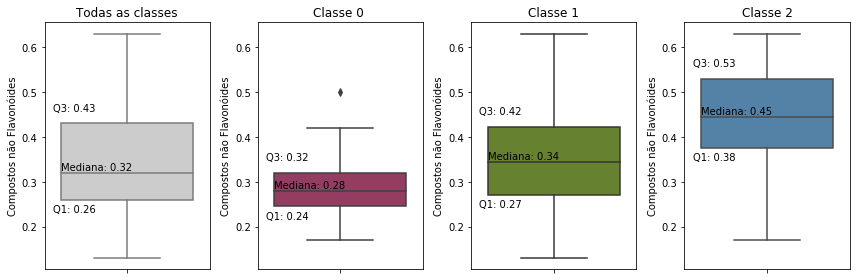

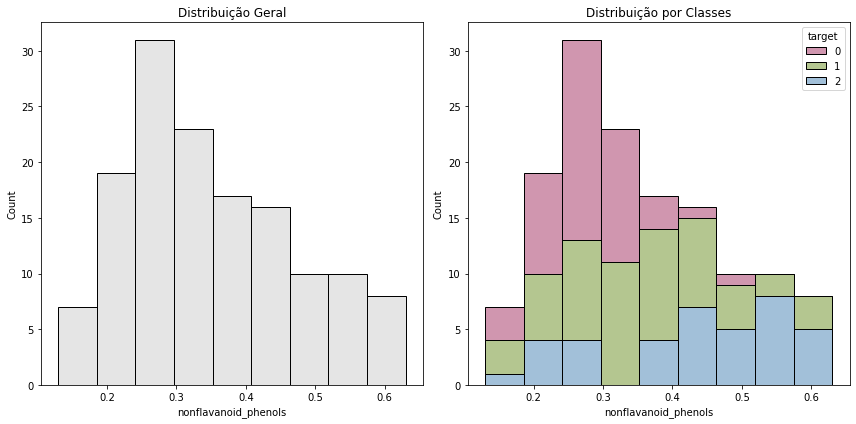

In [27]:
Box_Plot(data_treino = treino['nonflavanoid_phenols'], data_treino_0 = train_0['nonflavanoid_phenols'], data_treino_1 = train_1['nonflavanoid_phenols'], data_treino_2 = train_2['nonflavanoid_phenols'], nome_coluna = 'Compostos não Flavonóides')
dist(treino, 'nonflavanoid_phenols', 'target')

### 📊 2.9 Análise Exploratória - proanthocyanins
---
A coluna 'proanthocyanins' se refere a quantidade de proantocianidinas presentes no vinho.

São polímeros formados por unidades de flavanol, que são os mesmos compostos que compõem os flavonoides presentes nas uvas.

Essas substâncias são encontradas principalmente nas sementes e nas cascas das uvas, contribuindo para a estrutura e a cor do vinho. As proantocianidinas são responsáveis pela adstringência do vinho, ou seja, aquela sensação de "amarrar" a boca que pode ser percebida ao beber um vinho jovem e tânico.


In [28]:
desc_proanthocyanins = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'proanthocyanins')
desc_proanthocyanins

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,1.61,1.89,1.68,1.16
std,0.57,0.42,0.60,0.43
min,0.41,1.25,0.41,0.64
25%,1.26,1.60,1.35,0.84
50%,1.54,1.86,1.58,1.07
75%,1.96,2.06,1.95,1.34
max,3.58,2.96,3.58,2.70


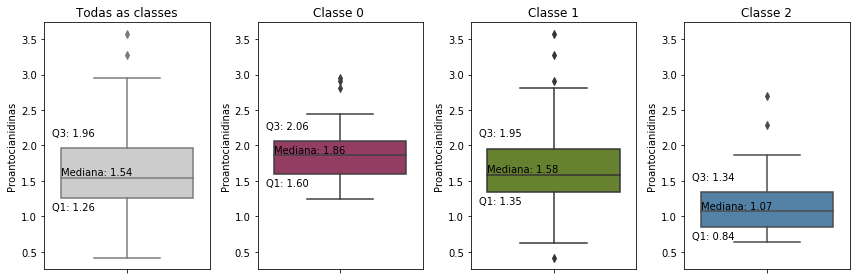

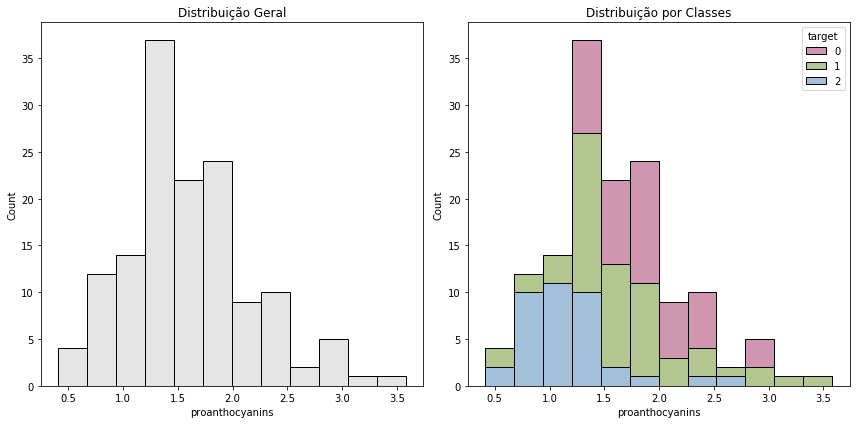

In [29]:
Box_Plot(data_treino = treino['proanthocyanins'], data_treino_0 = train_0['proanthocyanins'], data_treino_1 = train_1['proanthocyanins'], data_treino_2 = train_2['proanthocyanins'], nome_coluna = 'Proantocianidinas')
dist(treino, 'proanthocyanins', 'target')

### 📊 2.10 Análise Exploratória - color_intensity
---
A coluna 'color_intensity' se refere a intensidade da cor do vinho.

A intensidade da cor de um vinho pode variar de acordo com vários fatores, como a variedade da uva, o processo de vinificação e a idade do vinho. Geralmente, vinhos tintos mais escuros tendem a ter uma maior intensidade de cor em comparação com os vinhos tintos mais claros.

A intensidade da cor é influenciada pelos compostos fenólicos presentes nas uvas, como os antocianos, que são responsáveis pelas cores vermelhas, roxas e azuis dos vinhos tintos. Além dos antocianos, outros compostos, como os taninos, também podem contribuir para a intensidade da cor do vinho.

In [30]:
desc_color_intensity = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'color_intensity')
desc_color_intensity

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,5.02,5.42,3.09,7.38
std,2.34,1.18,0.99,2.43
min,1.28,3.52,1.28,3.85
25%,3.25,4.50,2.49,5.31
50%,4.68,5.20,2.90,7.20
75%,6.13,6.20,3.40,9.28
max,13.00,8.70,6.00,13.00


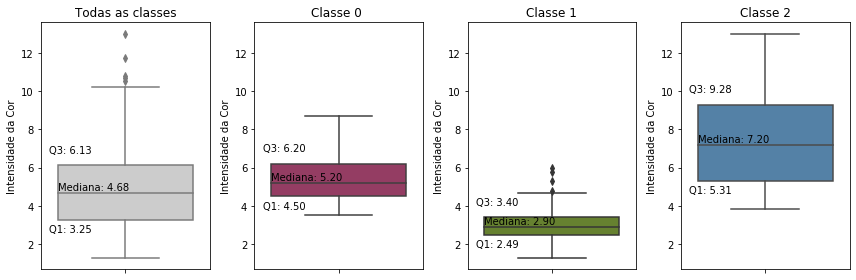

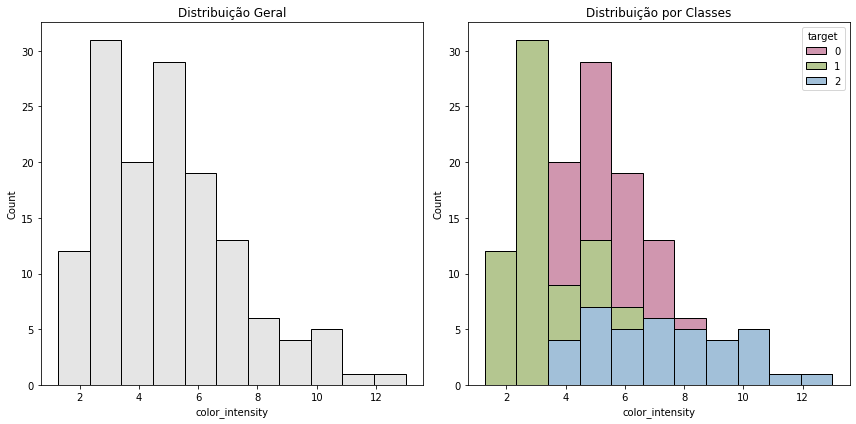

In [31]:
Box_Plot(data_treino = treino['color_intensity'], data_treino_0 = train_0['color_intensity'], data_treino_1 = train_1['color_intensity'], data_treino_2 = train_2['color_intensity'], nome_coluna = 'Intensidade da Cor')
dist(treino, 'color_intensity', 'target')

### 📊 2.11 Análise Exploratória - hue
---
A coluna 'hue' (matiz) se refere a tonalidade do vinho, que é uma medida da cor dominante percebida pelo olho humano. 

A matiz está relacionada à cor básica do vinho, que pode variar de vermelho a âmbar para vinhos tintos e de branco a dourado para vinhos brancos. A matiz é influenciada principalmente pela concentração e interação dos pigmentos presentes no vinho, como os antocianos (para vinhos tintos) e os flavonóides (para vinhos brancos).

A matiz pode fornecer informações sobre a maturação e a idade do vinho. Vinhos jovens tendem a ter uma matiz mais brilhante e vibrante, enquanto vinhos mais velhos podem apresentar tonalidades mais atenuadas e nuances de cor.

In [32]:
desc_hue = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'hue')
desc_hue

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,0.96,1.06,1.05,0.69
std,0.23,0.12,0.21,0.12
min,0.48,0.82,0.69,0.48
25%,0.78,1.00,0.92,0.59
50%,0.97,1.06,1.04,0.68
75%,1.12,1.12,1.19,0.77
max,1.71,1.28,1.71,0.96


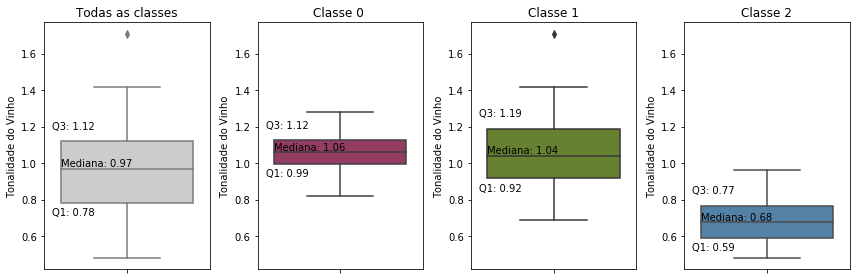

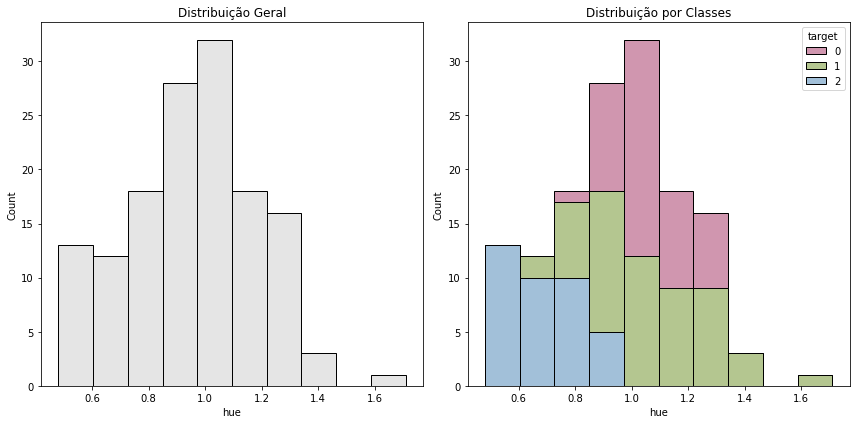

In [33]:
Box_Plot(data_treino = treino['hue'], data_treino_0 = train_0['hue'], data_treino_1 = train_1['hue'], data_treino_2 = train_2['hue'], nome_coluna = 'Tonalidade do Vinho')
dist(treino, 'hue', 'target')

### 📊 2.12 Análise Exploratória - od280/od315_of_diluted_wines
---
A coluna 'od280/od315_of_diluted_wines' se refere a relação entre a absorbância da luz a 280 nm e a absorbância a 315 nm.

Essa medida é comumente usada para avaliar a intensidade da cor dos vinhos.

A absorbância de luz em diferentes comprimentos de onda está relacionada à presença e concentração de compostos como antocianinas e polifenóis, que são responsáveis pela cor do vinho. A relação entre as absorbâncias em 280 nm e 315 nm pode fornecer uma estimativa da intensidade da cor e da presença desses compostos.

In [34]:
desc_od = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'od280/od315_of_diluted_wines')
desc_od

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,2.63,3.17,2.81,1.69
std,0.71,0.36,0.49,0.29
min,1.27,2.51,1.59,1.27
25%,2.00,2.87,2.46,1.52
50%,2.78,3.17,2.82,1.65
75%,3.18,3.46,3.16,1.82
max,4.00,4.00,3.69,2.47


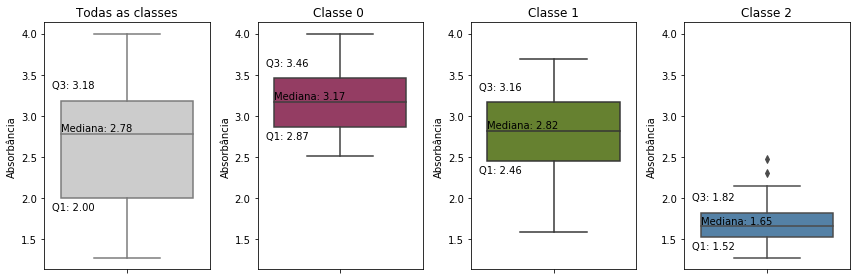

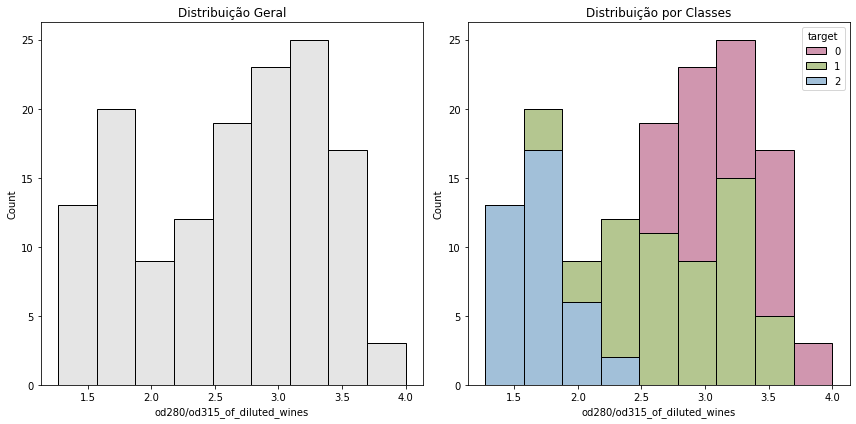

In [35]:
Box_Plot(data_treino = treino['od280/od315_of_diluted_wines'], data_treino_0 = train_0['od280/od315_of_diluted_wines'], data_treino_1 = train_1['od280/od315_of_diluted_wines'], data_treino_2 = train_2['od280/od315_of_diluted_wines'], nome_coluna = 'Absorbância')
dist(treino, 'od280/od315_of_diluted_wines', 'target')

### 📊 2.13 Análise Exploratória - proline
---
A coluna 'proline' se refere a quantidade de prolina, um aminoácido, presente no vinho.

A prolina é um componente importante na formação de proteínas e está envolvida em processos biológicos, incluindo a maturação e o desenvolvimento das uvas.

Valores mais altos de prolina podem estar relacionados a vinhos mais encorpados ou com sabores mais intensos.

In [36]:
desc_proline = analise_desc(data_treino = treino, data_treino_0 = train_0, data_treino_1 = train_1, data_treino_2 = train_2, coluna = 'proline')
desc_proline

,Todas as Classes,Classe 0,Classe 1,Classe 2
count,141.00,47.00,56.00,38.00
mean,741.85,1095.04,522.84,627.76
std,307.91,224.76,161.01,113.89
min,278.00,680.00,278.00,415.00
25%,502.00,945.00,406.75,552.50
50%,672.00,1060.00,491.50,622.50
75%,970.00,1272.50,626.25,691.25
max,1680.00,1680.00,985.00,855.00


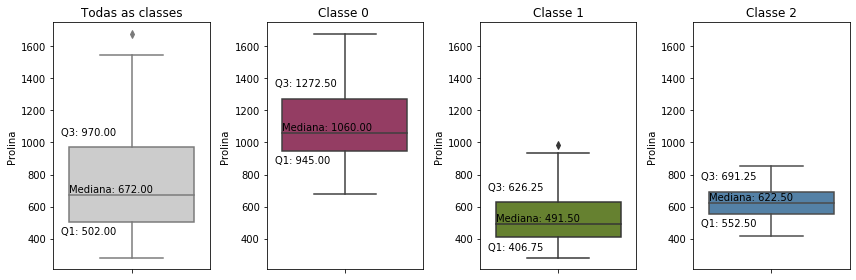

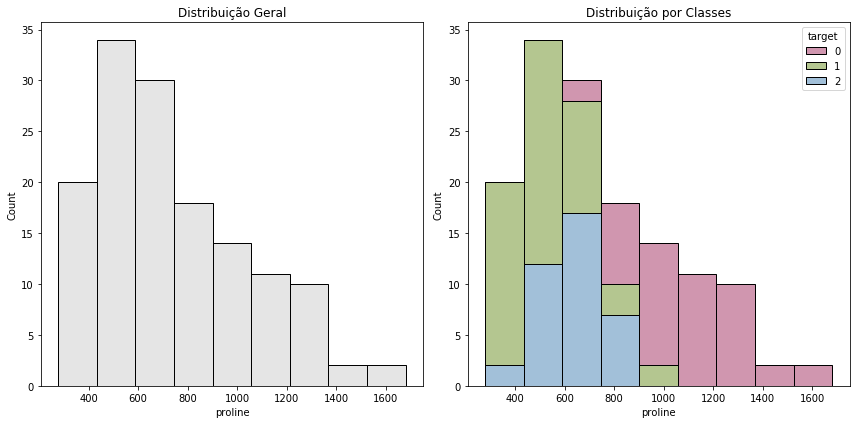

In [37]:
Box_Plot(data_treino = treino['proline'], data_treino_0 = train_0['proline'], data_treino_1 = train_1['proline'], data_treino_2 = train_2['proline'], nome_coluna = 'Prolina')
dist(treino, 'proline', 'target')

## 📊 2.2 Análise de Correlação

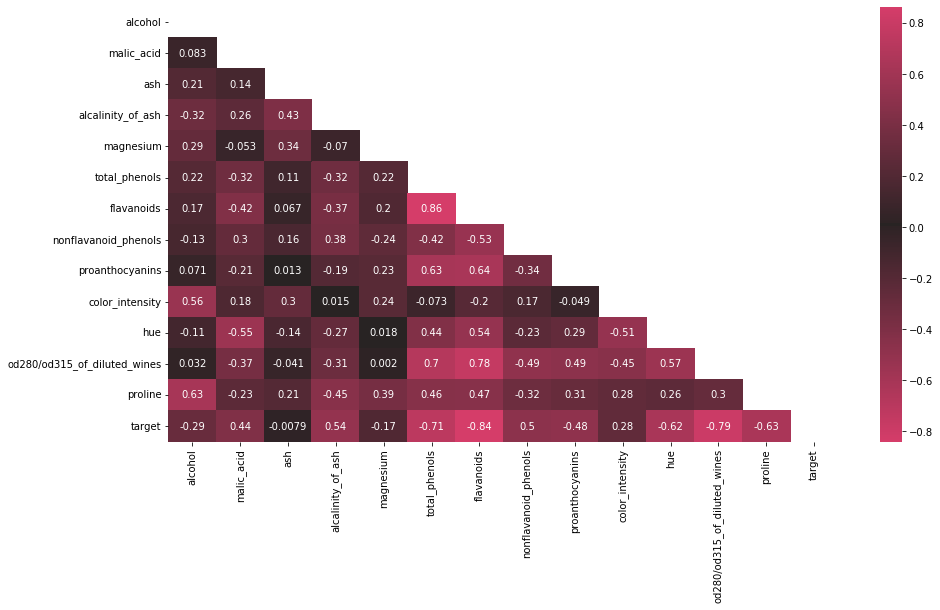

In [38]:
#########################################################################
#Fazendo o plot da matriz de correlação entre as variáveis contínuas

correlation_matrix = treino.corr()

# Converter a cor de hexadecimal para RGB
hex_color = "#191414"
rgb_color = tuple(int(hex_color[i:i+2], 16) for i in (1, 3, 5))

# Normalizar os valores de RGB para o intervalo de 0 a 1
normalized_rgb = tuple(v / 255 for v in rgb_color)

# Converter a cor de RGB para HSV
hsv_color = colorsys.rgb_to_hsv(*normalized_rgb)

# Mapear o valor de matiz no intervalo de 0 a 360
h_1 = hsv_color[0] * 360
h_2 = hsv_color[0] * 360

# Criando a paleta gradiente
#cmap = sns.cubehelix_palette(as_cmap=True)

cmap = sns.diverging_palette(h_neg= h_1, h_pos=h_2, s=75, l=50, sep=1, n=6, center='dark', as_cmap=True)

# Criar a máscara triangular superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(15, 8))  # Definindo o tamanho da figura

sns.heatmap(correlation_matrix, annot=True, cmap=cmap, ax=ax, mask=mask)

plt.show()  # Exibindo o gráfico

## 📊 2.3 Visualização das relações

Vemos que há uma relação direta entre algumas features.
Por exemplo, vamos analisar a feature `total_phenols`.
Note que sua relação com a feature `flavanoids` é alta, 0.87. Assim como a relação com `proanthocyanins`, e com `od280/od315_of_diluted_wines`.

Abaixo, printamos as relações para melhor visualização.
Quebramos por classes, para entender melhor os padrões.

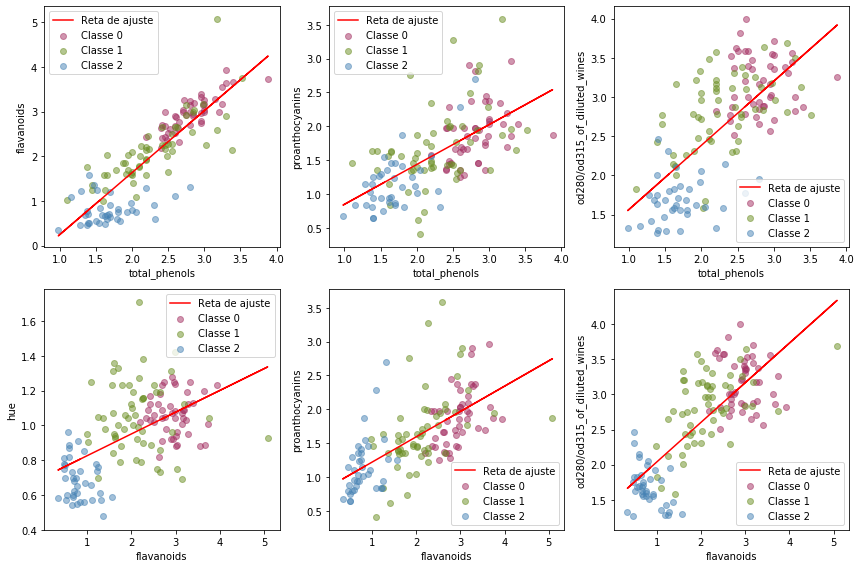

In [39]:
target_names = df['target'].unique()
feature_names = df.columns.to_list()

tupla_colunas = (("total_phenols", "flavanoids"), ("total_phenols", "proanthocyanins"), ("total_phenols", "od280/od315_of_diluted_wines"),
                 ("flavanoids", "hue"), ("flavanoids", "proanthocyanins"), ("flavanoids", "od280/od315_of_diluted_wines"))
plotar_graficos(tupla_colunas, treino, target_names, feature_names)

Note que podemos aplicar uma técnica de redução de dimensionalidade no conjunto de treino completo, para reduzirmos o espaço para uma dimensão menor.

## 📊 2.4 Redução de Dimensionalidade

Pela matriz de correlação, vemos que há vários features relacionadas. Logo, podemos aplicar um PCA para reduzir a dimensionalidade do conjunto de dados.

PCA (Principal Component Analysis) é uma técnica estatística que busca identificar os principais padrões e relações nos dados, e os representa em uma espaço de dimensão inferior.

Como o PCA é sensível a escala das variáveis, precisamos efetuar uma normalização para garantir consistência.

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Normalizando a base de treino
scaler = StandardScaler()
treino_normalizado = scaler.fit_transform(treino.drop(columns={'target'}) )

# Aplicar o PCA na base de treino e unir as bases
pca = PCA()
treino_pca = np.concatenate((pca.fit_transform(treino_normalizado), treino['target'].values.reshape(-1, 1)), axis=1)

# Aplicar a mesma transformação de normalização à base de teste
teste_normalizado = scaler.transform(teste.drop(columns={'target'}))

# Aplicar PCA à base de teste e unir as bases
teste_pca = np.concatenate((pca.transform(teste_normalizado), teste['target'] .values.reshape(-1, 1)), axis=1)

variance_explained = pca.explained_variance_ratio_
print("Variância explicada por cada componente principal:", variance_explained)

Variância explicada por cada componente principal: [0.35690646 0.19505622 0.11000748 0.07181928 0.06424464 0.05165564
 0.04447099 0.02720171 0.02337698 0.01840488 0.0164451  0.01212941
 0.00828121]


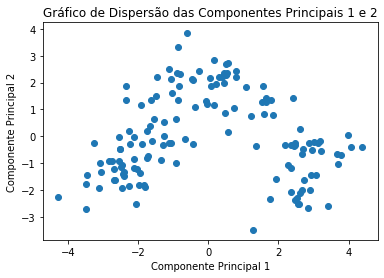

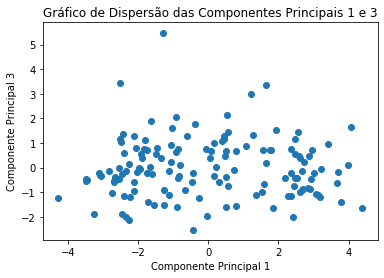

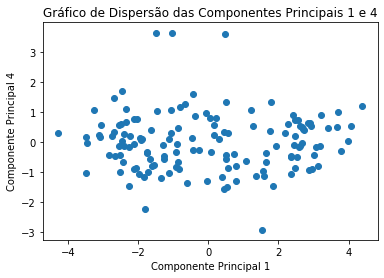

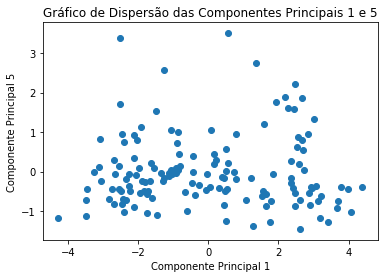

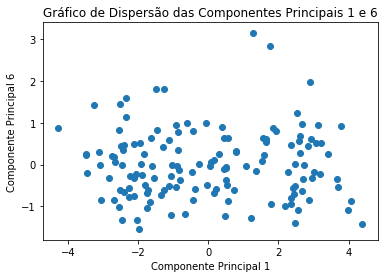

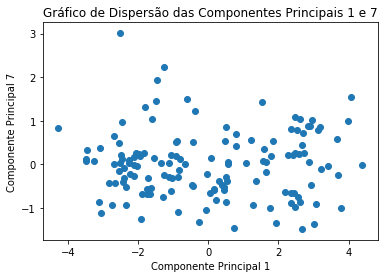

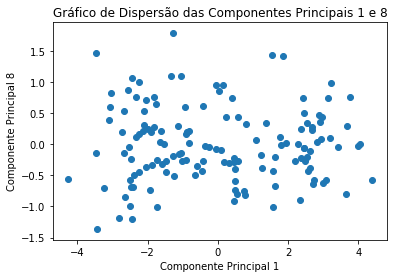

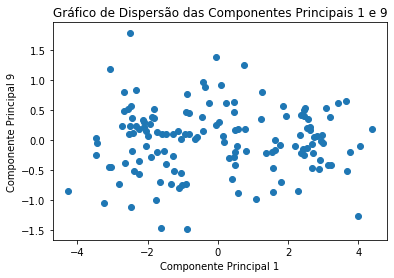

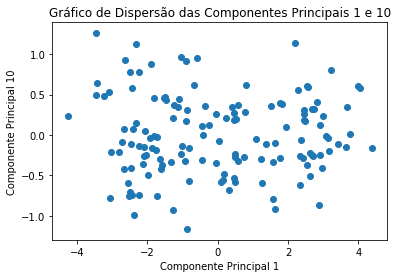

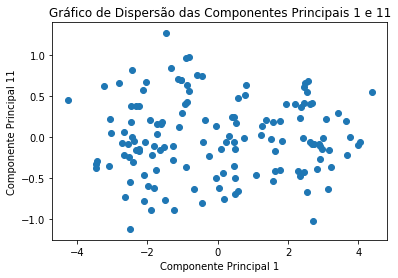

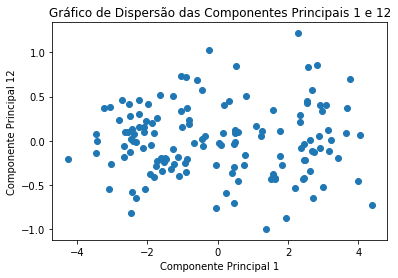

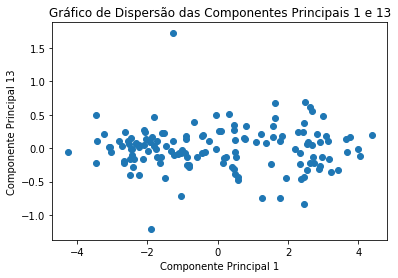

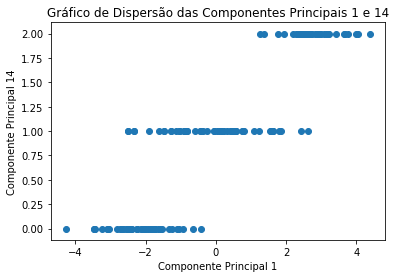

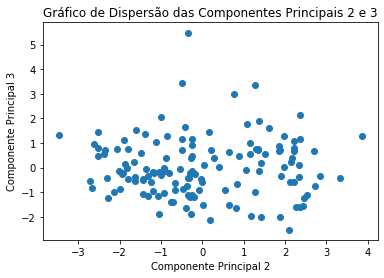

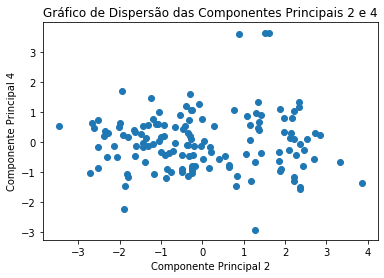

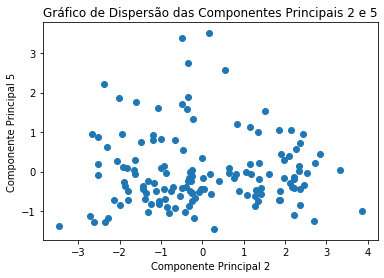

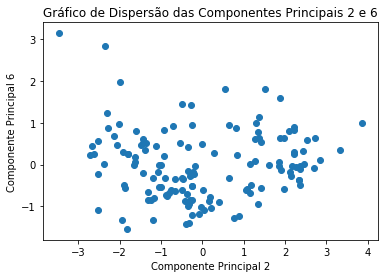

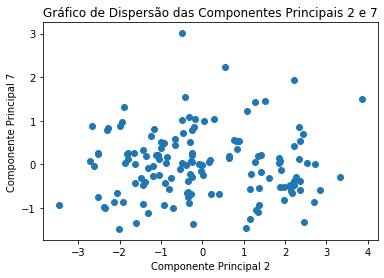

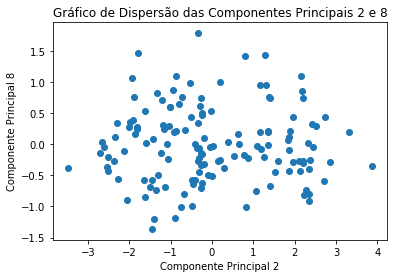

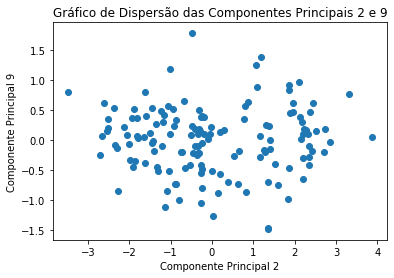

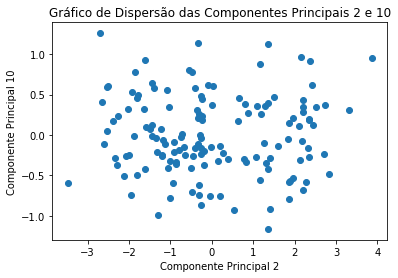

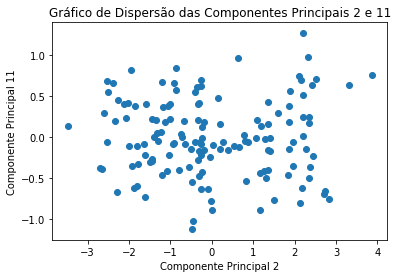

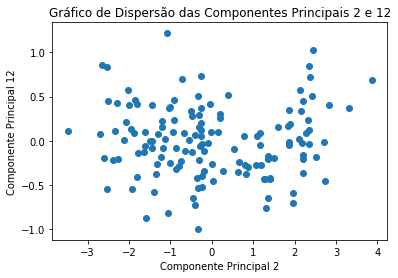

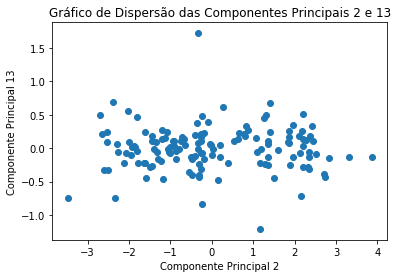

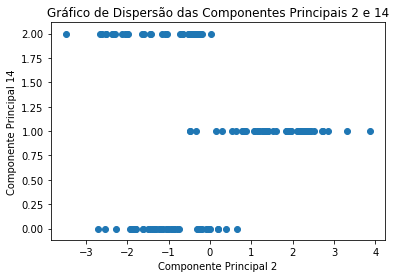

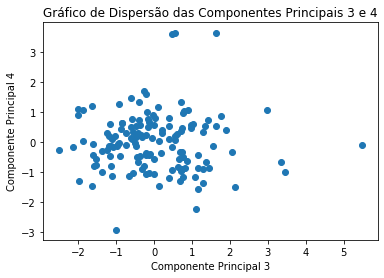

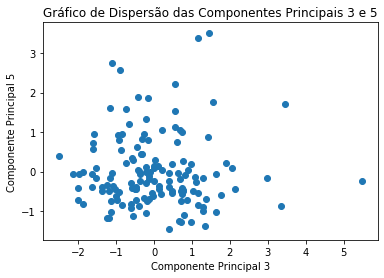

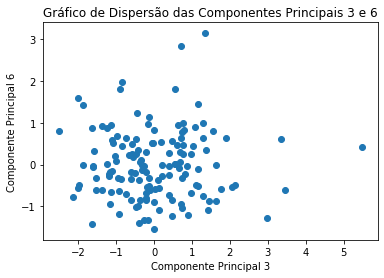

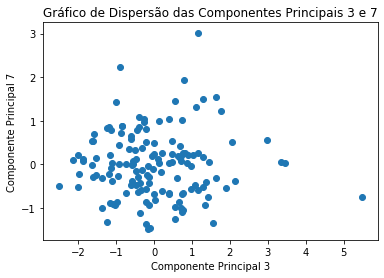

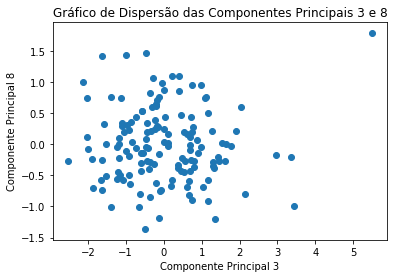

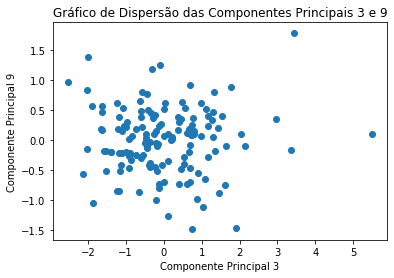

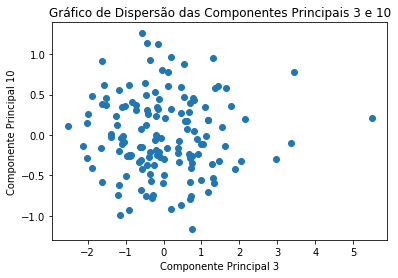

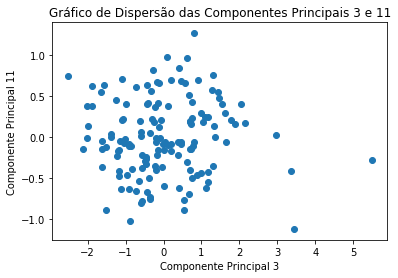

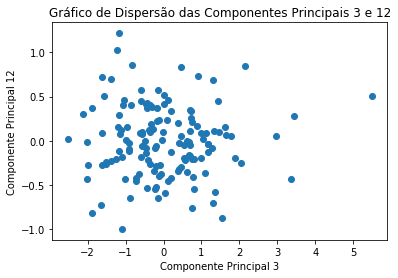

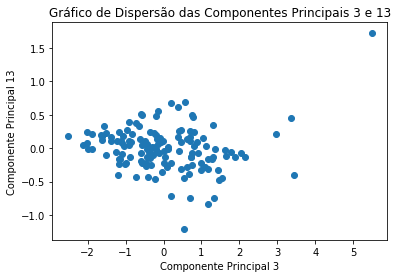

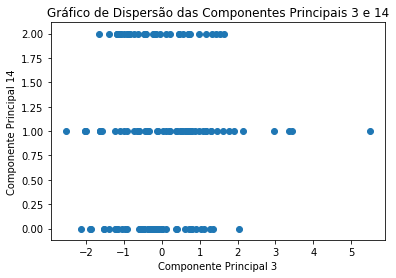

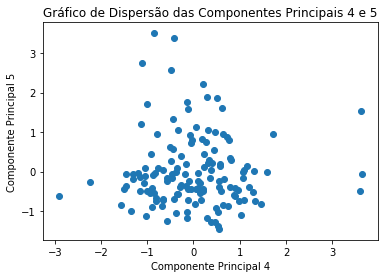

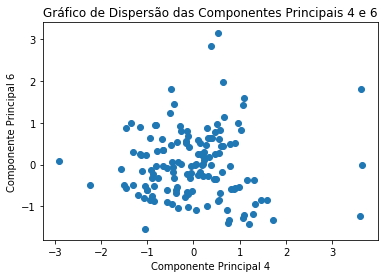

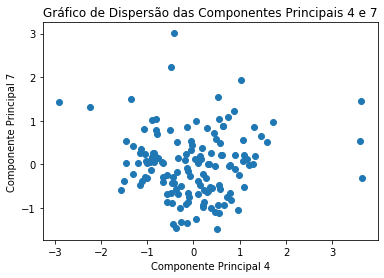

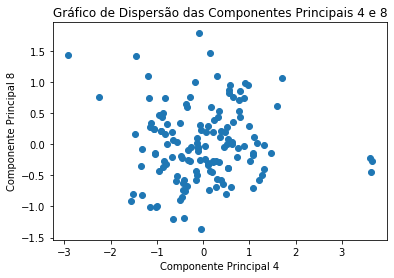

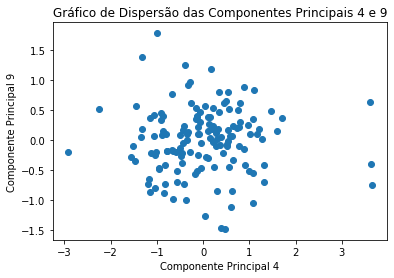

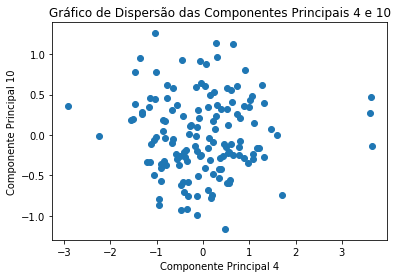

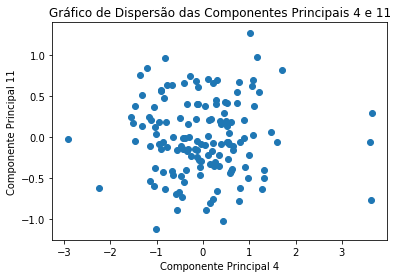

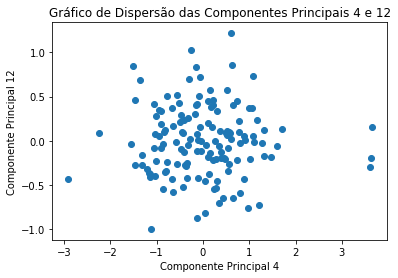

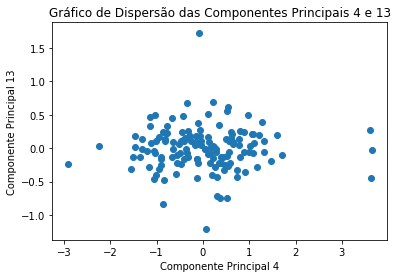

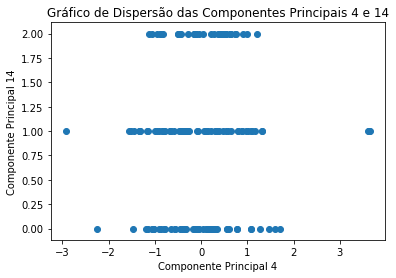

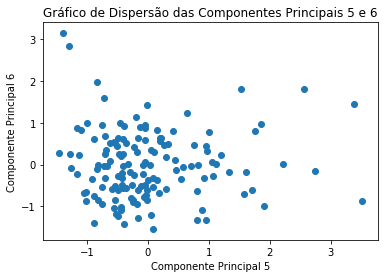

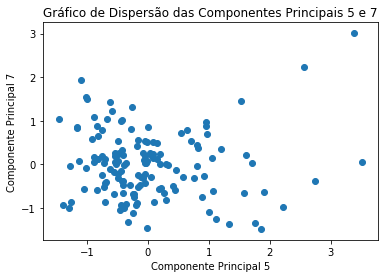

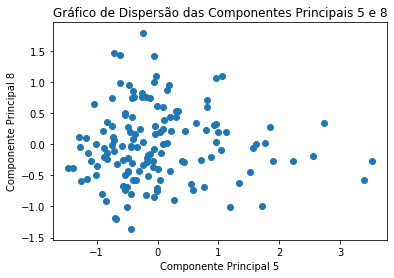

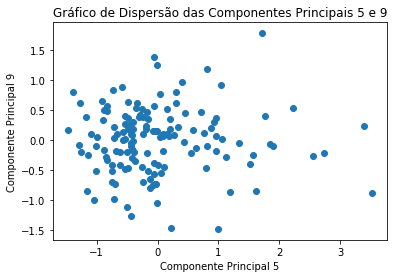

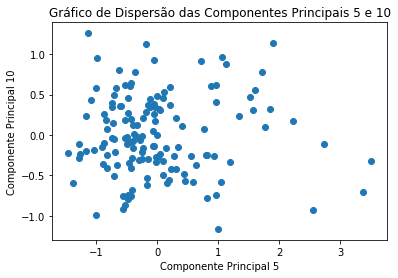

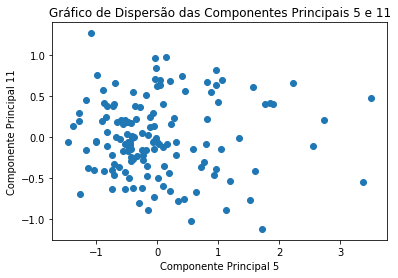

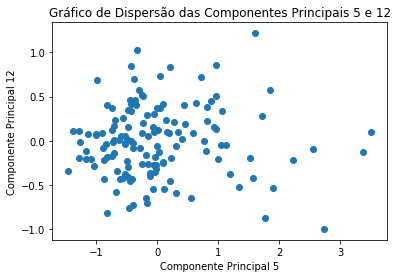

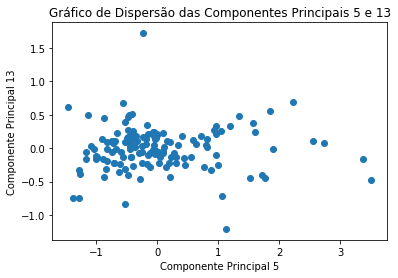

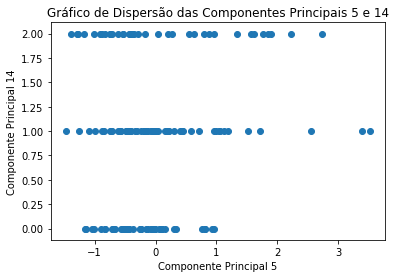

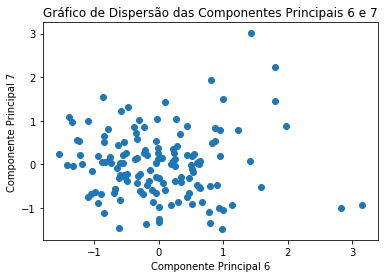

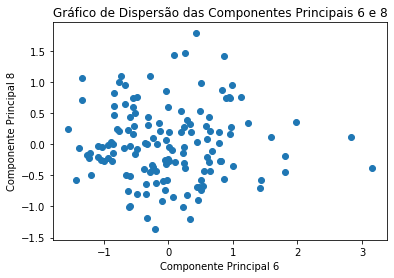

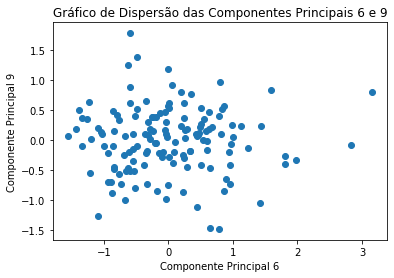

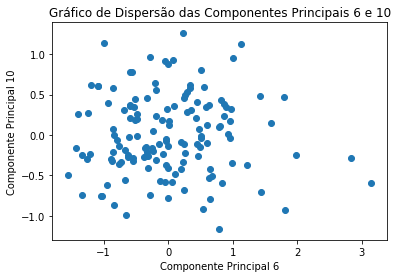

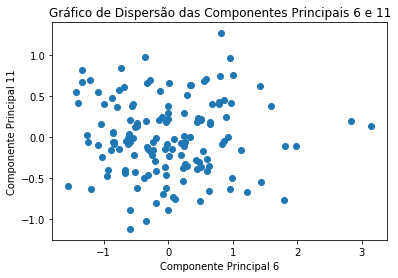

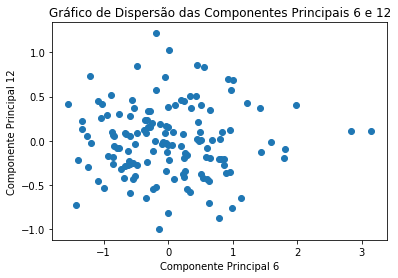

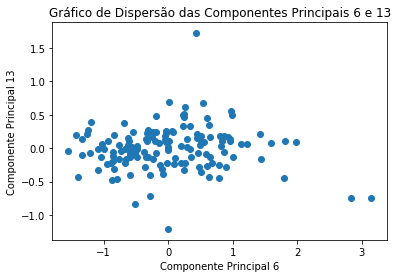

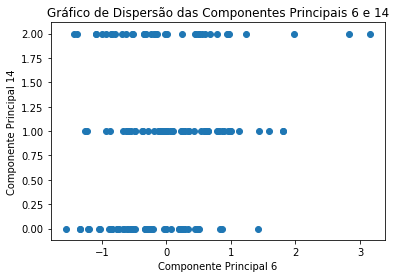

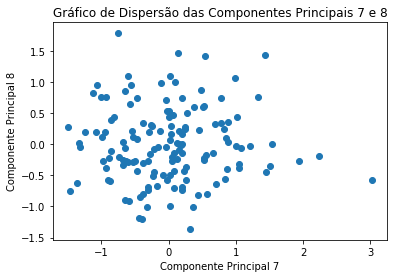

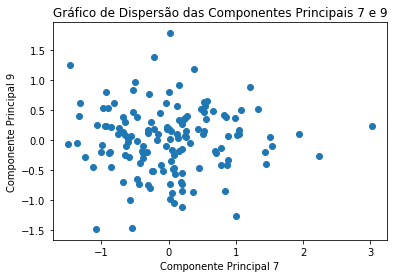

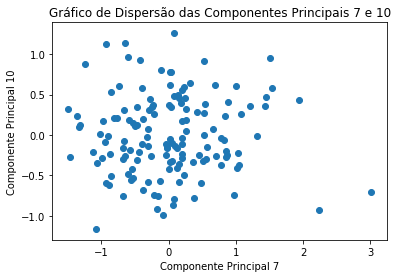

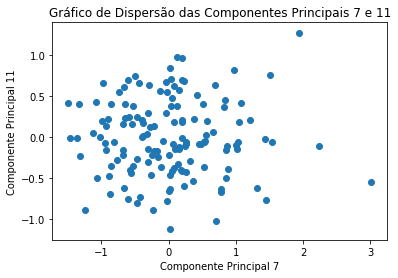

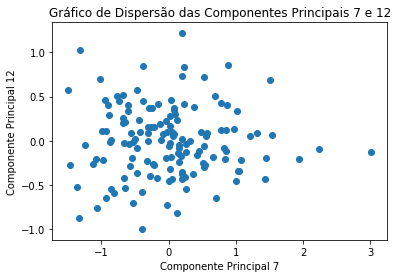

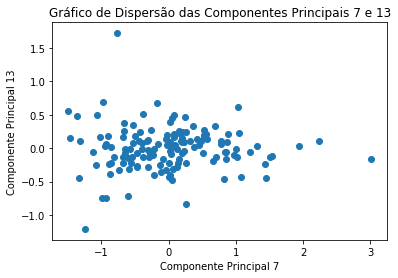

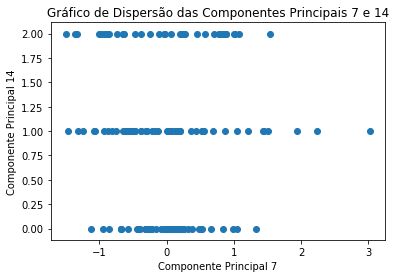

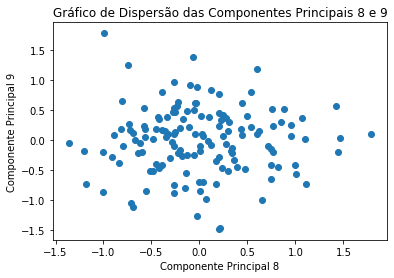

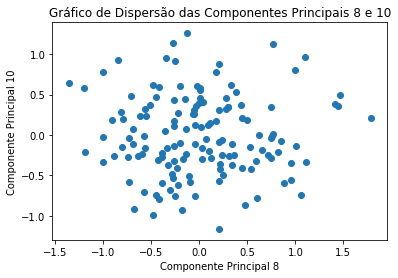

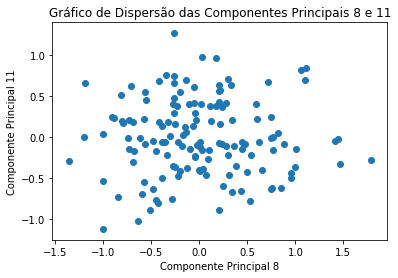

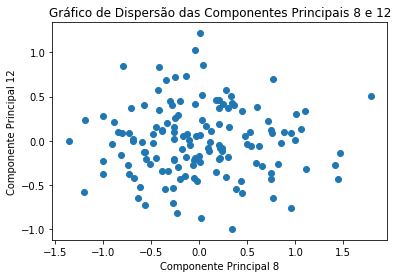

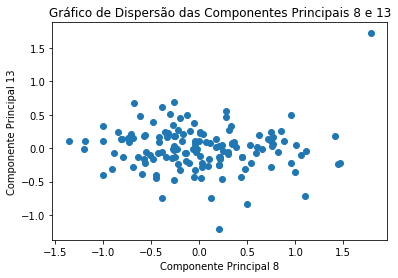

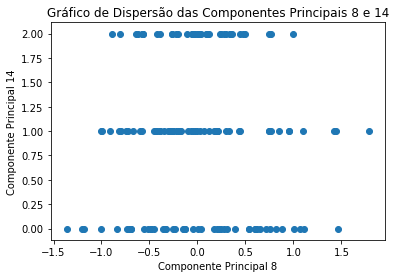

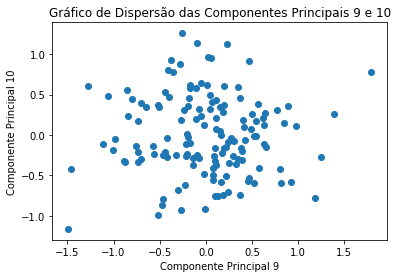

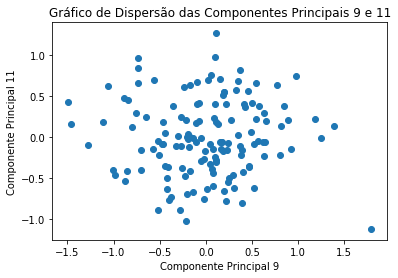

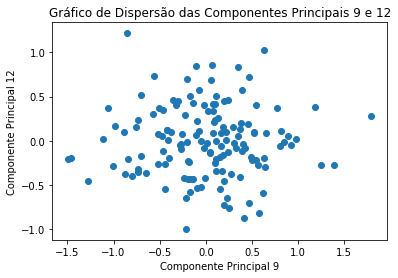

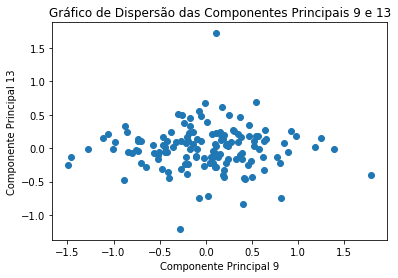

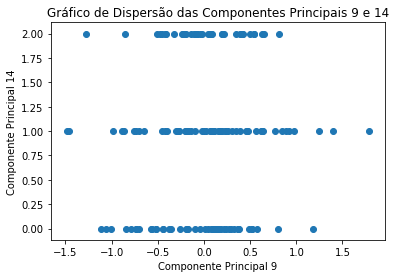

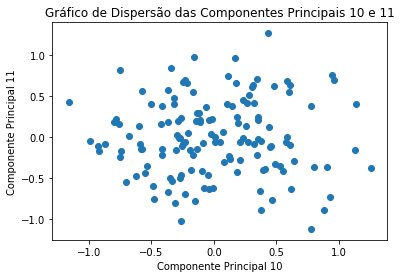

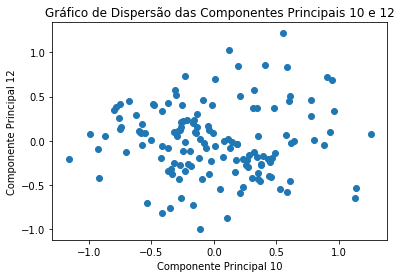

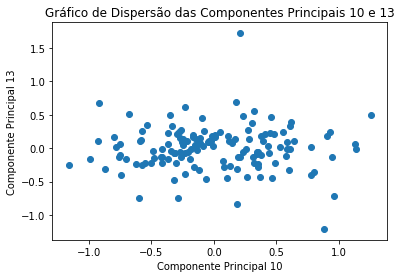

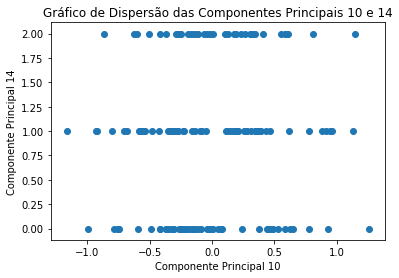

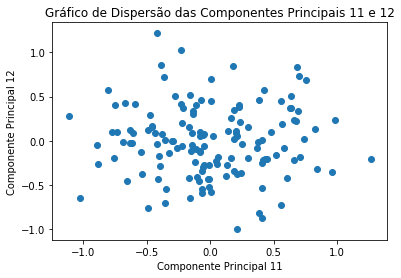

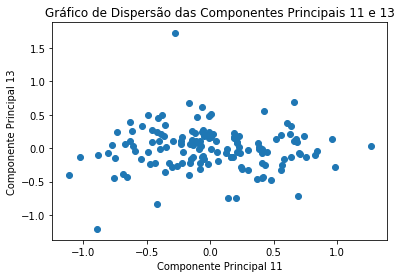

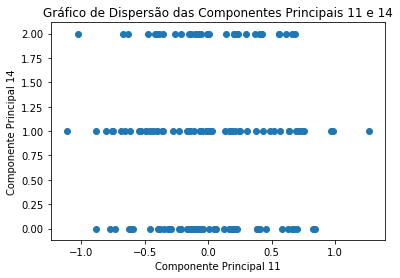

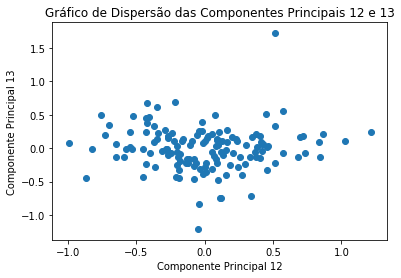

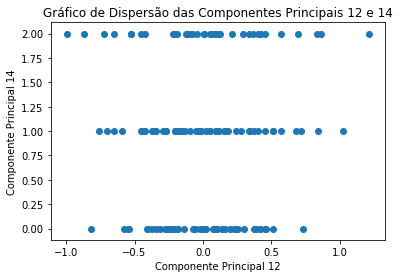

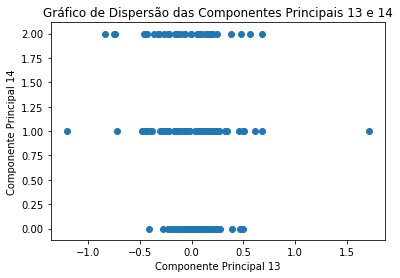

In [41]:
num_components = treino_pca.shape[1]  # número de componentes principais

# Plotar gráficos de dispersão de todas as combinações de componentes principais
for i in range(num_components):
    for j in range(i + 1, num_components):
        plt.scatter(treino_pca[:, i], treino_pca[:, j])
        plt.xlabel(f"Componente Principal {i+1}")
        plt.ylabel(f"Componente Principal {j+1}")
        plt.title(f"Gráfico de Dispersão das Componentes Principais {i+1} e {j+1}")
        plt.show()


## 🤖 3. Modelagem Estatística

In [42]:
# Listando as variáveis explicativas

vars_exp = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium','total_phenols', 'flavanoids', 'nonflavanoid_phenols','proanthocyanins', 'color_intensity', 'hue','od280/od315_of_diluted_wines', 'proline']

# Listando a variável resposta

vars_resp = ['target']

#### 🤖 3.1.1 Regressão Logística - Considerando base ajustada

Acurácia no Treino (PCA) - Regressão Logística: 1.0
Acurácia no Teste (PCA) - Regressão Logística: 0.94595


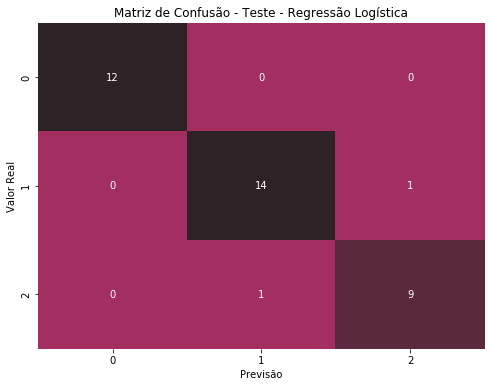

Primeira regressão Logística:

Coeficiente relacionado a variável alcohol: -1.2462819316521092  
Coeficiente relacionado a variável malic_acid: -0.8188822641145855  
Coeficiente relacionado a variável ash: -0.4571376171625301  
Coeficiente relacionado a variável alcalinity_of_ash: 0.04968731427279241  
Coeficiente relacionado a variável magnesium: -0.552314175636815  
Coeficiente relacionado a variável total_phenols: -0.607796117503936  
Coeficiente relacionado a variável flavanoids: 0.062100129346366495  
Coeficiente relacionado a variável nonflavanoid_phenols: 0.1083680133462959  
Coeficiente relacionado a variável proanthocyanins: -0.41877785502694703  
Coeficiente relacionado a variável color_intensity: -0.22486618826485644  
Coeficiente relacionado a variável hue: 0.046626562148164685  
Coeficiente relacionado a variável od280/od315_of_diluted_wines: 0.08151856383283873  
Coeficiente relacionado a variável proline: 0.17677771960598337  
Bias: 0.37978540670965805 

Segunda regressã

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Criar uma instância do modelo de regressão logística
model_logistic_regression = LogisticRegression(multi_class='multinomial', max_iter=100)

# Treinar o modelo com os dados de treino
model_logistic_regression.fit(treino_pca[:, :-1], treino_pca[:, -1])

y_pred_train_logistic = model_logistic_regression.predict(treino_pca[:, :-1])

# Calcular a acurácia do treino

accuracy_train_logistic = accuracy_score(treino_pca[:, -1], y_pred_train_logistic)
print("Acurácia no Treino (PCA) - Regressão Logística:", accuracy_train_logistic.round(5))

# Fazer previsões com os dados de teste
y_pred_logistic = model_logistic_regression.predict(teste_pca[:, :-1])

# Calcular a acurácia das previsões
accuracy_logistic = accuracy_score(teste_pca[:, -1], y_pred_logistic)
print("Acurácia no Teste (PCA) - Regressão Logística:", accuracy_logistic.round(5))


################################################################################################
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a matriz de confusão
cm = confusion_matrix(teste_pca[:, -1], y_pred_logistic)

cmap = sns.dark_palette("#a32e61", reverse=True)
# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=cmap, fmt='g', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Teste - Regressão Logística')
plt.show()

coefficients = model_logistic_regression.coef_
bias = model_logistic_regression.intercept_

print("Primeira regressão Logística:\n")
for i, y in enumerate(vars_exp):
    print(f'''Coeficiente relacionado a variável {vars_exp[i]}: {coefficients[0][i]}  ''')
print(f'''Bias: {bias[0]} \n''')

print("Segunda regressão Logística:\n")
for i, y in enumerate(vars_exp):
    print(f'''Coeficiente relacionado a variável {vars_exp[i]}: {coefficients[1][i]}  ''')
print(f'''Bias: {bias[1]} \n''')

print("Terceira regressão Logística:\n")
for i, y in enumerate(vars_exp):
    print(f'''Coeficiente relacionado a variável {vars_exp[i]}: {coefficients[2][i]}  ''')
print(f'''Bias: {bias[2]} \n''')

#### 🤖 3.1.2 Regressão Logística - Considerando base original

Acurácia no Treino - Regressão Logística: 0.97872
Acurácia no Teste - Regressão Logística: 0.94595


C:\Users\GZ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


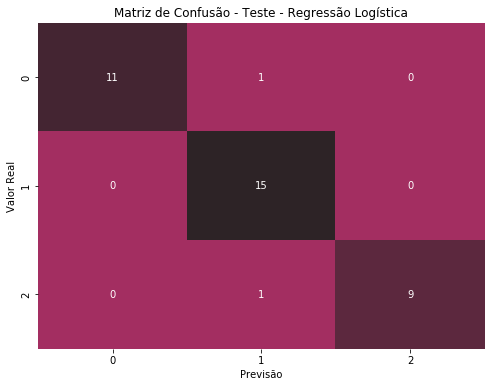

Primeira regressão Logística:

Coeficiente relacionado a variável alcohol: 0.23502059507883297  
Coeficiente relacionado a variável malic_acid: 0.2988461419340011  
Coeficiente relacionado a variável ash: 0.1113225732094519  
Coeficiente relacionado a variável alcalinity_of_ash: -0.47675587885519416  
Coeficiente relacionado a variável magnesium: -0.0505292441224808  
Coeficiente relacionado a variável total_phenols: 0.2295800404800133  
Coeficiente relacionado a variável flavanoids: 0.4236756227951124  
Coeficiente relacionado a variável nonflavanoid_phenols: -0.02111289046022655  
Coeficiente relacionado a variável proanthocyanins: 0.04493042035975124  
Coeficiente relacionado a variável color_intensity: 0.13986685462132867  
Coeficiente relacionado a variável hue: 0.004912118927348842  
Coeficiente relacionado a variável od280/od315_of_diluted_wines: 0.32755498834937063  
Coeficiente relacionado a variável proline: 0.010403755580823149  
Bias: -0.010102030169821908 

Segunda regress

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Criar uma instância do modelo de regressão logística
model_logistic_regression = LogisticRegression(multi_class='multinomial', max_iter=100)

# Treinar o modelo com os dados de treino
model_logistic_regression.fit(treino[vars_exp], treino[vars_resp].values.ravel())

y_pred_train_logistic = model_logistic_regression.predict(treino[vars_exp])

# Calcular a acurácia do treino

accuracy_train_logistic = accuracy_score(treino[vars_resp], y_pred_train_logistic)
print("Acurácia no Treino - Regressão Logística:", accuracy_train_logistic.round(5))

# Fazer previsões com os dados de teste
y_pred_logistic = model_logistic_regression.predict(teste[vars_exp])

# Calcular a acurácia das previsões
accuracy_logistic = accuracy_score(teste[vars_resp], y_pred_logistic)
print("Acurácia no Teste - Regressão Logística:", accuracy_logistic.round(5))


################################################################################################
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a matriz de confusão
cm = confusion_matrix(teste[vars_resp], y_pred_logistic)

cmap = sns.dark_palette("#a32e61", reverse=True)
# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=cmap, fmt='g', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Teste - Regressão Logística')
plt.show()

coefficients = model_logistic_regression.coef_
bias = model_logistic_regression.intercept_

print("Primeira regressão Logística:\n")
for i, y in enumerate(vars_exp):
    print(f'''Coeficiente relacionado a variável {vars_exp[i]}: {coefficients[0][i]}  ''')
print(f'''Bias: {bias[0]} \n''')

print("Segunda regressão Logística:\n")
for i, y in enumerate(vars_exp):
    print(f'''Coeficiente relacionado a variável {vars_exp[i]}: {coefficients[1][i]}  ''')
print(f'''Bias: {bias[1]} \n''')

print("Terceira regressão Logística:\n")
for i, y in enumerate(vars_exp):
    print(f'''Coeficiente relacionado a variável {vars_exp[i]}: {coefficients[2][i]}  ''')
print(f'''Bias: {bias[2]} \n''')

|  | Acurácia no Treino | Acurácia no Teste |
|----------:|:-----------------:|:----------------:|
| **Com PCA**  | 1.0 | 0.94595  |
| **Sem PCA**  | 0.97872 | 0.94595  |


Vemos que a Acurácia no Treino foi de 0.97872 e no teste de 0.94595, para a base original.
Considerando a base ajustada via PCA, temos uma Acurácia de 1.0 no treino e de  0.94595 no teste.

Logo, percebemos que mesmo reduzindo a dimensionalidade, a acurária no teste obteve o mesmo resultado.





#### 🤖 3.2.1 Árvore de Decisão - Considerando base ajustada

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Criar uma instância do modelo de árvore de decisão
model_tree = DecisionTreeClassifier()

# Treinar o modelo com os dados de treino
model_tree.fit(treino_pca[:, :-1], treino_pca[:, -1])

y_pred_train_tree = model_tree.predict(treino_pca[:, :-1])

# Calcular a acurácia do treino

accuracy_train_tree = accuracy_score(treino_pca[:, -1], y_pred_train_tree)

print("Acurácia no Treino (PCA) - Árvore de Decisão:", accuracy_train_tree.round(5))

# Fazer previsões com os dados de teste
y_pred_tree = model_tree.predict(teste_pca[:, :-1])

# Calcular a acurácia das previsões
accuracy_tree = accuracy_score(teste_pca[:, -1], y_pred_tree)
print("Acurácia no Teste (PCA) - Árvore de Decisão:", accuracy_tree.round(5))

Acurácia no Treino (PCA) - Árvore de Decisão: 1.0
Acurácia no Teste (PCA) - Árvore de Decisão: 0.91892


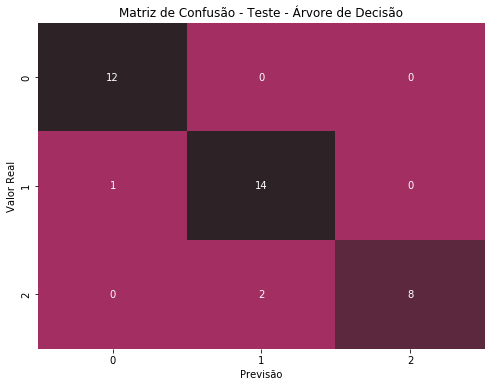

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a matriz de confusão
cm = confusion_matrix(teste_pca[:, -1], y_pred_tree)

cmap = sns.dark_palette("#a32e61", reverse=True)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=cmap, fmt='g', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Teste - Árvore de Decisão')
plt.show()

#### 🤖 3.2.2 Árvore de Decisão - Considerando base original

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Criar uma instância do modelo de árvore de decisão
model_tree = DecisionTreeClassifier()

# Treinar o modelo com os dados de treino
model_tree.fit(treino[vars_exp], treino[vars_resp].values.ravel())

y_pred_train_tree = model_tree.predict(treino[vars_exp])

# Calcular a acurácia do treino

accuracy_train_tree = accuracy_score(treino[vars_resp], y_pred_train_tree)
print("Acurácia no Treino - Árvore de Decisão:", accuracy_train_tree.round(5))

# Fazer previsões com os dados de teste
y_pred_tree = model_tree.predict(teste[vars_exp])

# Calcular a acurácia das previsões
accuracy_tree = accuracy_score(teste[vars_resp], y_pred_tree)
print("Acurácia no Teste - Árvore de Decisão:", accuracy_tree.round(5))

Acurácia no Treino - Árvore de Decisão: 1.0
Acurácia no Teste - Árvore de Decisão: 0.94595


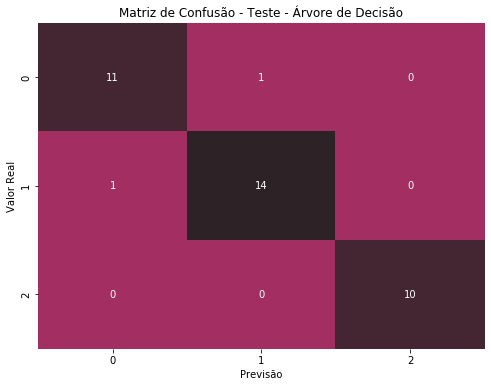

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a matriz de confusão
cm = confusion_matrix(teste[vars_resp], y_pred_tree)

cmap = sns.dark_palette("#a32e61", reverse=True)
# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=cmap, fmt='g', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Teste - Árvore de Decisão')
plt.show()

|  | Acurácia no Treino | Acurácia no Teste |
|----------:|:-----------------:|:----------------:|
| **Com PCA**  | 1.0 | 0.94595  |
| **Sem PCA**  | 1.0 | 0.94595  |

Vemos que tanto a Acurácia no Treino quanto à do teste de 0.94595 foram as mesmas para as bases original, e com aplicação do PCA.

Logo, percebemos que mesmo reduzindo a dimensionalidade, não obtevemos variação no resultado.

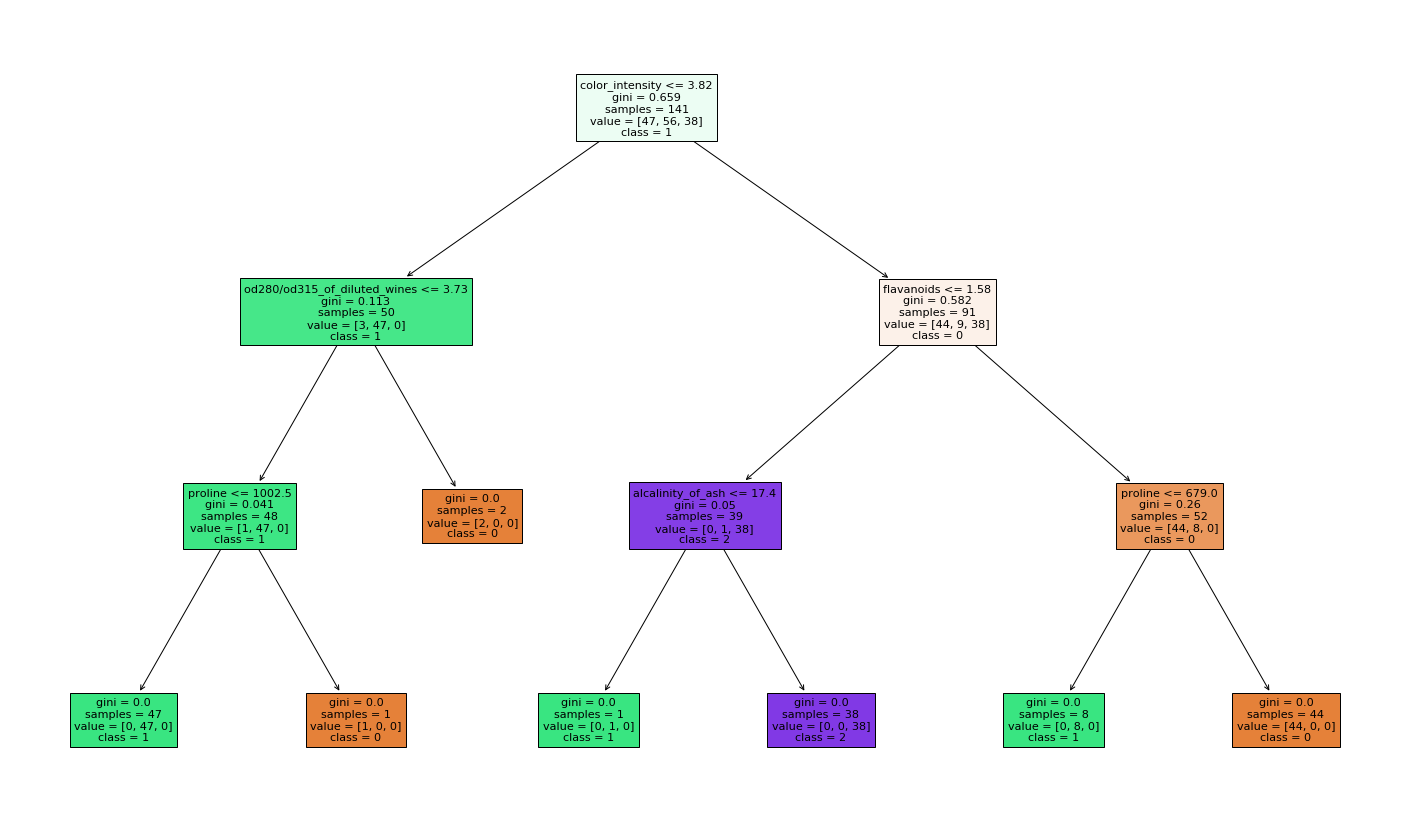

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

# Plotar a árvore de decisão
fig, ax = plt.subplots(figsize=(25, 15))
tree.plot_tree(model_tree, feature_names=vars_exp, class_names=['0','1','2'], filled=True)
plt.show()

In [50]:
importance = model_tree.feature_importances_
importance

for i, y in enumerate(vars_exp):
    print(f'''A importância da variável {y} é: {round(importance[i],2)} ''')

A importância da variável alcohol é: 0.0 
A importância da variável malic_acid é: 0.0 
A importância da variável ash é: 0.0 
A importância da variável alcalinity_of_ash é: 0.02 
A importância da variável magnesium é: 0.0 
A importância da variável total_phenols é: 0.0 
A importância da variável flavanoids é: 0.4 
A importância da variável nonflavanoid_phenols é: 0.0 
A importância da variável proanthocyanins é: 0.0 
A importância da variável color_intensity é: 0.37 
A importância da variável hue é: 0.0 
A importância da variável od280/od315_of_diluted_wines é: 0.04 
A importância da variável proline é: 0.17 


Vemos que para a árvore de decisão, apenas 5 features foram utilizadas para determinar a classificação do vinho:


*   Flavanoids
*   color_intensity 
*   proline
*   hue
*   od280/od315_of_diluted_wines



#### 🤖 3.3 Boosting - Considerando base Ajustada

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Criar uma instância do modelo Gradient Boosting para classificação multiclasse
model_boosting = GradientBoostingClassifier()

# Treinar o modelo com os dados de treino
model_boosting.fit(treino_pca[:, :-1], treino_pca[:, -1])
y_pred_train_boosting = model_boosting.predict(treino_pca[:, :-1])

# Calcular a acurácia do treino
accuracy_train_boosting = accuracy_score(treino_pca[:, -1], y_pred_train_boosting)
print("Acurácia no Treino (PCA) - Boosting:", accuracy_train_boosting.round(5))

# Fazer previsões com os dados de teste
y_pred_boosting = model_boosting.predict(teste_pca[:, :-1])

# Calcular a acurácia das previsões
accuracy_boosting = accuracy_score(teste_pca[:, -1], y_pred_boosting)
print("Acurácia no Teste (PCA) - Boosting:", accuracy_boosting.round(5))

Acurácia no Treino (PCA) - Boosting: 1.0
Acurácia no Teste (PCA) - Boosting: 0.89189


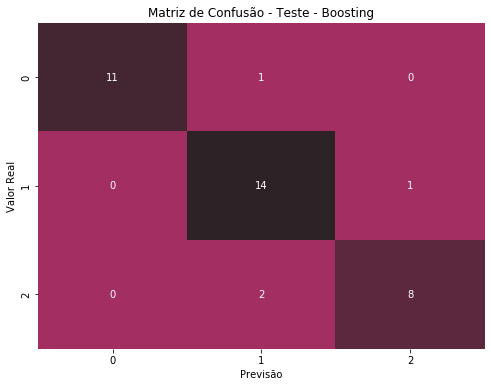

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a matriz de confusão
cm = confusion_matrix(teste_pca[:, -1], y_pred_boosting)

cmap = sns.dark_palette("#a32e61", reverse=True)
# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=cmap, fmt='g', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Teste - Boosting')
plt.show()

In [53]:
# Obtenha o número de árvores
num_arvores = model_boosting.n_estimators
print("Número de árvores geradas:", num_arvores)

Número de árvores geradas: 100


#### 🤖 3.3 Boosting - Considerando base Original

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Criar uma instância do modelo Gradient Boosting para classificação multiclasse
model_boosting = GradientBoostingClassifier()

# Treinar o modelo com os dados de treino
model_boosting.fit(treino[vars_exp], treino[vars_resp].values.ravel())
y_pred_train_boosting = model_boosting.predict(treino[vars_exp])

# Calcular a acurácia do treino
accuracy_train_boosting = accuracy_score(treino[vars_resp], y_pred_train_boosting)
print("Acurácia no Treino - Boosting:", accuracy_train_boosting.round(5))

# Fazer previsões com os dados de teste
y_pred_boosting = model_boosting.predict(teste[vars_exp])

# Calcular a acurácia das previsões
accuracy_boosting = accuracy_score(teste[vars_resp], y_pred_boosting)
print("Acurácia no Teste - Boosting:", accuracy_boosting.round(5))

Acurácia no Treino - Boosting: 1.0
Acurácia no Teste - Boosting: 1.0


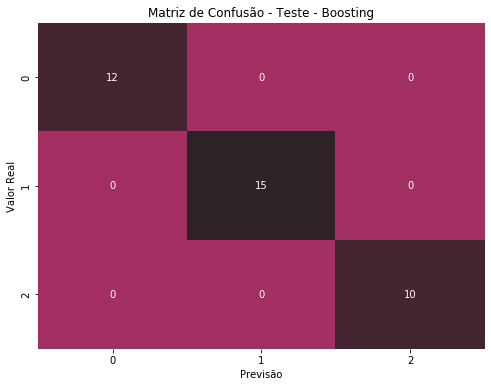

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a matriz de confusão
cm = confusion_matrix(teste[vars_resp], y_pred_boosting)

cmap = sns.dark_palette("#a32e61", reverse=True)
# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=cmap, fmt='g', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Teste - Boosting')
plt.show()

In [56]:
# Obtenha o número de árvores
num_arvores = model_boosting.n_estimators
print("Número de árvores geradas:", num_arvores)

Número de árvores geradas: 100


|  | Acurácia no Treino | Acurácia no Teste |
|----------:|:-----------------:|:----------------:|
| **Com PCA**  | 1.0 | 0.89189  |
| **Sem PCA**  | 1.0 | 1.0  |

Uma acurácia perfeita nos dados de treinamento pode indicar um possivel overfitting, ou seja, o modelo pode estar se adaptando tão bem aos dados de treinamento guardando os exemplos passados ao invés de aprender padrões mais genéricos. Poderiamos ter tido um desempenho ruim na base de testes, o que não aconteceu.

Concluimos que a acurácia perfeita se deu por estarmos utilizando uma base de dados de treinamento muito limpa e consistente, gerando uma qualidade excelente aos dados. 
Outro ponto importante é o tamanho da base de dados, que é bem pequeno, facilitando ao modelo boosting se adaptar perfeitamente ao conjunto de dados.

Precisariamos avaliar o comportamento do modelo em uma base bem maior, visto que foram geradas apenas 100 árvores (estimadores) durante o processo de boosting.

In [57]:
importances = model_boosting.feature_importances_
for i, importance in enumerate(importances):
    print(f"{vars_exp[i]}: {importance}")

alcohol: 0.022081672096692647
malic_acid: 0.0432159384903692
ash: 0.004590597137234588
alcalinity_of_ash: 0.00857097037871288
magnesium: 0.007187867943118863
total_phenols: 0.0016546364047017462
flavanoids: 0.31843932984346396
nonflavanoid_phenols: 0.0018753616158000564
proanthocyanins: 3.470359713489549e-05
color_intensity: 0.28870867978600046
hue: 0.007157350275255718
od280/od315_of_diluted_wines: 0.023590578753280324
proline: 0.2728923136782346


Podemos ver que no boosting todas as features possuem algum grau de de importância.



**A nível de curiosidade, o modelo Boosting faz diversas árvores de decisão. No Boosting feito nesse trabalho, são realizadas 100 árvores. O código abaixo mostra cada uma delas**

In [ ]:
from sklearn import tree

for i, arvores in enumerate(model_boosting.estimators_):
    
  print(f"Árvore {i+1}:")
    
  fig, ax = plt.subplots(figsize=(25, 15))
  tree.plot_tree(arvores[0], feature_names=vars_exp, class_names=['0','1','2'], filled=True)
  plt.show()
    
  fig, ax = plt.subplots(figsize=(25, 15))
  tree.plot_tree(arvores[1], feature_names=vars_exp, class_names=['0','1','2'], filled=True)
  plt.show()
    
  fig, ax = plt.subplots(figsize=(25, 15))
  tree.plot_tree(arvores[2], feature_names=vars_exp, class_names=['0','1','2'], filled=True)
  plt.show()

In [ ]:
# from sklearn import tree
# import pydotplus
# from IPython.display import Image

# tree_images = []

# for i, arvore in enumerate(model_boosting.estimators_):
#     fig, ax = plt.subplots(figsize=(25, 15))
#     tree.plot_tree(arvore[0], feature_names=vars_exp, class_names=['0','1','2'], filled=True)
#     plt.savefig(f"tree_0_{i+1}.png")  # Salva a imagem da árvore em um arquivo

#     fig, ax = plt.subplots(figsize=(25, 15))
#     tree.plot_tree(arvore[1], feature_names=vars_exp, class_names=['0','1','2'], filled=True)
#     plt.savefig(f"tree_1_{i+1}.png")  # Salva a imagem da árvore em um arquivo

#     fig, ax = plt.subplots(figsize=(25, 15))
#     tree.plot_tree(arvore[2], feature_names=vars_exp, class_names=['0','1','2'], filled=True)
#     plt.savefig(f"tree_2_{i+1}.png")  # Salva a imagem da árvore em um arquivo

#     plt.close(fig)
    
#     for i in (0,1,2):
#       dot_data = tree.export_graphviz(arvore[i], out_file=None, feature_names=vars_exp, class_names=['0','1','2'], filled=True)
#       graph = pydotplus.graph_from_dot_data(dot_data)
#       tree_images.append(graph.create_png())

# # Salva todas as imagens das árvores em um arquivo
# with open("trees.html", "wb") as f:
#     for image in tree_images:
#         f.write(image)

# # Exibe a visualização das árvores em um notebook
# for image in tree_images:
#     display(Image(image))


## ⚖ 4. Comparação e Conclusões

In [65]:
data = {
    'Acuráricia no Treino': ['97%', '100%', '100%'],
    'Acurácia no Teste': ['94%', '94%', '100%'],
    '#Features': [13, 5, 13]
}

index = ['Regressão Logística', 'Árvore de Decisão', 'Boosting']

df_comparacao = pd.DataFrame(data, index=index)

df_comparacao_style = df_comparacao.style.set_properties(**{'text-align': 'center'})

df_comparacao_style

,Acuráricia no Treino,Acurácia no Teste,#Features
Regressão Logística,97%,94%,13
Árvore de Decisão,100%,94%,5
Boosting,100%,100%,13


Ambos os modelos Regressão Logística e Árvore de Decisão tiveram a mesma acurácia no teste (94%), porém a Árvore de Decisão precisou de 8 features a menos que a Regressão Logística podendo ser considerado um modelo mais eficiente quando comparado ao primeiro. 

Além disso, em uma situação real, a não utilização de uma feature poderia gerar economia tanto no custo de armazenamento dos dados como no custo operacional não sendo mais necessário uma máquina ou um sensor para medir tal feature. Essa consideração é importante ao decidir quais features incluir no modelo e pode ser um fator relevante na escolha do modelo mais adequado para a aplicação em questão.

Já o Boosting apresentou uma acurácia de 100% tanto no treinamento quanto no teste, utilizando todas as features disponíveis. Isso indica que o modelo conseguiu classificar os dados de forma precisa e acurada, sem cometer erros.

Ao considerar o custo e a eficiência do modelo Boosting, deve-se levar em conta o número de features utilizadas. Neste caso, como todas as features foram empregadas, é necessário avaliar se o ganho de acurácia justifica o aumento na complexidade computacional e os recursos necessários para lidar com todas as características.

## 👣 5. Next Steps

- Implantação do Modelo: ao decidir colocar o modelo em produção, é necessário escolher qual plataforma o modelo será implantado, também é necessário fazer o código que irá para produção e monitorar as features para que se tenha dados com qualidade e, consequentemente, uma previsão de qualidade;


- Monitoramento: também se faz necessário monitorar ao longo do tempo as métricas e performances do modelo, tais métricas podem indicar a necessidade de recalibragem do modelo ou erros operacionais;


- Recalibragem: caso o modelo perca performance ao longo do tempo ou ocorram mudanças nos dados de entrada, é importante considerar a recalibração do modelo. Isso pode envolver a reavaliação das features utilizadas, a inclusão de novas features relevantes ou até mesmo a redefinição dos hiperparâmetros do modelo. A recalibração tem como objetivo garantir que o modelo continue a fornecer previsões precisas e confiáveis.